In [1]:
#=======================================
## DNN_cla_Glass-Identification (Cross validation)
#=======================================

# Need compile Create_DNN_model.

#----------------------------------------
# Change the current working directory to the specified path.

import os

os.getcwd()


'C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Classification\\Glass-Identification'

In [2]:
#----------------------------------------
# Set random seed for reproducibility.

seed = 543
from numpy import random
random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(seed)

# Import classes and functions.

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt


C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#----------------------------------------
# Load the Glass-Identification dataset.

dataset = np.loadtxt("Glass-Identification-Data.txt", delimiter = ",")

print(type(dataset))

print(dataset.shape)

index = [3, 4, 7, 8]

X = dataset[:, index]
Y = dataset[:, 10]

print(X.shape)
print(Y.shape)

Y = np.array(Y, dtype = int)

print(np.unique(Y))


<class 'numpy.ndarray'>
(214, 11)
(214, 4)
(214,)
[1 2 3 5 6 7]


In [4]:
#----------------------------------------
# one-hot encoding of output variable.

Y_train = np.zeros((len(Y), 7), dtype = int)

for i in range(len(Y)):
	Y_train[i, Y[i] - 1] = 1

np.unique(Y_train)


array([0, 1])

In [5]:
#----------------------------------------
# Standardize the input data.

X_sample_mean = np.mean(X, axis = 0)
print(np.round(X_sample_mean, 4))

X_sample_std = np.std(X, axis = 0, ddof = 1)
print(np.round(X_sample_std, 4))

standardize = lambda x: (x - np.mean(x, axis = 0)) / np.std(x, axis = 0, ddof = 1)

X_train = standardize(X)

print(np.round(np.mean(X_train, axis = 0), 4))
print(np.round(np.std(X_train, axis = 0, ddof = 1), 4))


[2.6845 1.4449 8.957  0.175 ]
[1.4424 0.4993 1.4232 0.4972]
[-0. -0. -0. -0.]
[1. 1. 1. 1.]


In [6]:
## Create DNN model

def create_DNN_model(nodes, drop, kernel, act):
  model = Sequential()
  # Build input_layer & first_hidden_layer
  if drop[0] > 0:
    model.add(Dropout(rate = drop[0], input_shape = (nodes[0], )))
    model.add(Dense(units = nodes[1], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  else:
    model.add(Dense(units = nodes[1], input_dim = nodes[0], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  # Build other_hidden_layer
  for i in range(2, len(nodes) - 1):
    model.add(Dense(units = nodes[i], kernel_initializer = kernel[i-1], activation =act[i-1]))
    if drop[i] > 0:
      model.add(Dropout(rate = drop[i]))
  # Build output_layer
  model.add(Dense(units = nodes[len(nodes)-1], kernel_initializer = kernel[len(kernel) - 1], activation = act[len(act) - 1]))
  return model


In [7]:
#----------------------------------------
# Define 10-fold cross validation test index sets.

fold_num = 10

L = len(X_train)

quotient = L // fold_num
remainder = L % fold_num

fold_length = np.array([quotient]*fold_num)
if remainder > 0:
    fold_length[0:remainder] = fold_length[0:remainder] + 1

index_begin = np.zeros(fold_num, dtype = int)
index_begin[0] = 0

for j in range(1, fold_num):
    index_begin[j] = index_begin[j-1] + fold_length[j-1]

index = np.random.choice(np.arange(L), size = L, replace = False)


In [8]:
#----------------------------------------
# Create the DNN_model

input_dim = X.shape[1]

nodes = [input_dim, 5, 6, 6, 7]
	# first component: number of input nodes
	# last component: number of output nodes

drop = [0, 0.1, 0.2, 0.2]
	# len(dropout_rate) = len(node) - 1
	# first component: dropout rate for the input layer
	# other components: dropout rates for the hidden layers
	# Dropout rate is not used in the output layer.

#dropout_rate = [0]*(len(node)-1)
#dropout_rate = [0] + [0.2]*(len(node)-2)

kernel = ['uniform', 'uniform', 'uniform', 'uniform']

act = ['relu', 'relu', 'relu', 'softmax']


In [9]:
#----------------------------------------
# 10-fold cross validation

cv_cc = []
cv_acc = []

for k in range(fold_num):
    # Build the model.
    model = create_DNN_model(nodes, drop, kernel, act)
    #model.summary()
    # Compile the model.
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    # Select index sets.
    seq_index = range(index_begin[k], (index_begin[k] + fold_length[k]))
    test_index = index[seq_index]
    train_index = np.delete(index, seq_index)
    # Fit the model.
    history = model.fit(X_train[train_index], Y_train[train_index], validation_split = 0.2, epochs = 1000, batch_size = 20, verbose = 2)
    # Evaluate the model.
    scores = model.evaluate(X_train[test_index], Y_train[test_index], verbose = 0)
    print("%s: %.4f" % (model.metrics_names[0], scores[0]))
    print("%s: %.4f" % (model.metrics_names[1], scores[1]))
    cv_cc.append(scores[0])
    cv_acc.append(scores[1])


Train on 153 samples, validate on 39 samples
Epoch 1/1000
 - 0s - loss: 1.9433 - acc: 0.3268 - val_loss: 1.9402 - val_acc: 0.3333
Epoch 2/1000
 - 0s - loss: 1.9365 - acc: 0.3725 - val_loss: 1.9340 - val_acc: 0.3333
Epoch 3/1000
 - 0s - loss: 1.9296 - acc: 0.3725 - val_loss: 1.9276 - val_acc: 0.3333
Epoch 4/1000
 - 0s - loss: 1.9222 - acc: 0.3725 - val_loss: 1.9208 - val_acc: 0.3333
Epoch 5/1000
 - 0s - loss: 1.9142 - acc: 0.3725 - val_loss: 1.9134 - val_acc: 0.3333
Epoch 6/1000
 - 0s - loss: 1.9057 - acc: 0.3725 - val_loss: 1.9053 - val_acc: 0.3333
Epoch 7/1000
 - 0s - loss: 1.8963 - acc: 0.3725 - val_loss: 1.8965 - val_acc: 0.3333
Epoch 8/1000
 - 0s - loss: 1.8862 - acc: 0.3725 - val_loss: 1.8869 - val_acc: 0.3333
Epoch 9/1000
 - 0s - loss: 1.8737 - acc: 0.3725 - val_loss: 1.8760 - val_acc: 0.3333
Epoch 10/1000
 - 0s - loss: 1.8618 - acc: 0.3725 - val_loss: 1.8636 - val_acc: 0.3333
Epoch 11/1000
 - 0s - loss: 1.8454 - acc: 0.3725 - val_loss: 1.8486 - val_acc: 0.3333
Epoch 12/1000
 - 0

Epoch 96/1000
 - 0s - loss: 1.2080 - acc: 0.5425 - val_loss: 1.3572 - val_acc: 0.4872
Epoch 97/1000
 - 0s - loss: 1.2121 - acc: 0.4641 - val_loss: 1.3593 - val_acc: 0.4872
Epoch 98/1000
 - 0s - loss: 1.2030 - acc: 0.5490 - val_loss: 1.3606 - val_acc: 0.4872
Epoch 99/1000
 - 0s - loss: 1.1880 - acc: 0.5098 - val_loss: 1.3626 - val_acc: 0.4872
Epoch 100/1000
 - 0s - loss: 1.1836 - acc: 0.5752 - val_loss: 1.3651 - val_acc: 0.4872
Epoch 101/1000
 - 0s - loss: 1.2134 - acc: 0.5686 - val_loss: 1.3658 - val_acc: 0.4872
Epoch 102/1000
 - 0s - loss: 1.1863 - acc: 0.5359 - val_loss: 1.3667 - val_acc: 0.4872
Epoch 103/1000
 - 0s - loss: 1.1825 - acc: 0.5229 - val_loss: 1.3666 - val_acc: 0.4872
Epoch 104/1000
 - 0s - loss: 1.1691 - acc: 0.5163 - val_loss: 1.3681 - val_acc: 0.4872
Epoch 105/1000
 - 0s - loss: 1.1611 - acc: 0.5752 - val_loss: 1.3698 - val_acc: 0.4872
Epoch 106/1000
 - 0s - loss: 1.1421 - acc: 0.5425 - val_loss: 1.3706 - val_acc: 0.4872
Epoch 107/1000
 - 0s - loss: 1.1689 - acc: 0.54

Epoch 191/1000
 - 0s - loss: 1.0749 - acc: 0.5686 - val_loss: 1.5111 - val_acc: 0.4872
Epoch 192/1000
 - 0s - loss: 1.0841 - acc: 0.5556 - val_loss: 1.5148 - val_acc: 0.4872
Epoch 193/1000
 - 0s - loss: 1.1006 - acc: 0.5294 - val_loss: 1.5187 - val_acc: 0.4872
Epoch 194/1000
 - 0s - loss: 1.1175 - acc: 0.5098 - val_loss: 1.5218 - val_acc: 0.5641
Epoch 195/1000
 - 0s - loss: 1.0710 - acc: 0.5621 - val_loss: 1.5224 - val_acc: 0.5641
Epoch 196/1000
 - 0s - loss: 1.0831 - acc: 0.5163 - val_loss: 1.5250 - val_acc: 0.5641
Epoch 197/1000
 - 0s - loss: 1.0569 - acc: 0.5817 - val_loss: 1.5283 - val_acc: 0.4872
Epoch 198/1000
 - 0s - loss: 1.1061 - acc: 0.5425 - val_loss: 1.5309 - val_acc: 0.4872
Epoch 199/1000
 - 0s - loss: 1.0781 - acc: 0.5752 - val_loss: 1.5341 - val_acc: 0.4872
Epoch 200/1000
 - 0s - loss: 1.0793 - acc: 0.5425 - val_loss: 1.5364 - val_acc: 0.4872
Epoch 201/1000
 - 0s - loss: 1.0790 - acc: 0.5556 - val_loss: 1.5402 - val_acc: 0.4872
Epoch 202/1000
 - 0s - loss: 1.0912 - acc: 

 - 0s - loss: 1.0360 - acc: 0.5359 - val_loss: 1.6308 - val_acc: 0.4872
Epoch 286/1000
 - 0s - loss: 1.0306 - acc: 0.5686 - val_loss: 1.6313 - val_acc: 0.4872
Epoch 287/1000
 - 0s - loss: 1.0370 - acc: 0.5686 - val_loss: 1.6315 - val_acc: 0.4872
Epoch 288/1000
 - 0s - loss: 1.0324 - acc: 0.5948 - val_loss: 1.6322 - val_acc: 0.4872
Epoch 289/1000
 - 0s - loss: 1.0579 - acc: 0.5425 - val_loss: 1.6332 - val_acc: 0.4872
Epoch 290/1000
 - 0s - loss: 1.0480 - acc: 0.5621 - val_loss: 1.6344 - val_acc: 0.6154
Epoch 291/1000
 - 0s - loss: 1.0477 - acc: 0.5098 - val_loss: 1.6352 - val_acc: 0.5641
Epoch 292/1000
 - 0s - loss: 1.0449 - acc: 0.5098 - val_loss: 1.6376 - val_acc: 0.5641
Epoch 293/1000
 - 0s - loss: 1.0172 - acc: 0.5686 - val_loss: 1.6383 - val_acc: 0.5641
Epoch 294/1000
 - 0s - loss: 1.0247 - acc: 0.5425 - val_loss: 1.6396 - val_acc: 0.6154
Epoch 295/1000
 - 0s - loss: 1.0258 - acc: 0.6144 - val_loss: 1.6419 - val_acc: 0.4872
Epoch 296/1000
 - 0s - loss: 1.0274 - acc: 0.5752 - val_lo

Epoch 380/1000
 - 0s - loss: 0.9919 - acc: 0.6144 - val_loss: 1.7081 - val_acc: 0.6154
Epoch 381/1000
 - 0s - loss: 1.0245 - acc: 0.5686 - val_loss: 1.7108 - val_acc: 0.5897
Epoch 382/1000
 - 0s - loss: 0.9941 - acc: 0.5686 - val_loss: 1.7110 - val_acc: 0.4872
Epoch 383/1000
 - 0s - loss: 0.9793 - acc: 0.6078 - val_loss: 1.7129 - val_acc: 0.4872
Epoch 384/1000
 - 0s - loss: 1.0147 - acc: 0.5490 - val_loss: 1.7125 - val_acc: 0.4872
Epoch 385/1000
 - 0s - loss: 0.9971 - acc: 0.5556 - val_loss: 1.7149 - val_acc: 0.4872
Epoch 386/1000
 - 0s - loss: 1.0231 - acc: 0.5425 - val_loss: 1.7164 - val_acc: 0.5897
Epoch 387/1000
 - 0s - loss: 1.0060 - acc: 0.5752 - val_loss: 1.7190 - val_acc: 0.5641
Epoch 388/1000
 - 0s - loss: 1.0039 - acc: 0.5229 - val_loss: 1.7177 - val_acc: 0.5641
Epoch 389/1000
 - 0s - loss: 0.9805 - acc: 0.5752 - val_loss: 1.7132 - val_acc: 0.5385
Epoch 390/1000
 - 0s - loss: 1.0094 - acc: 0.5621 - val_loss: 1.7115 - val_acc: 0.4872
Epoch 391/1000
 - 0s - loss: 1.0320 - acc: 

Epoch 475/1000
 - 0s - loss: 0.9842 - acc: 0.5621 - val_loss: 1.7882 - val_acc: 0.5897
Epoch 476/1000
 - 0s - loss: 1.0248 - acc: 0.5556 - val_loss: 1.7901 - val_acc: 0.5897
Epoch 477/1000
 - 0s - loss: 0.9728 - acc: 0.5882 - val_loss: 1.7933 - val_acc: 0.6154
Epoch 478/1000
 - 0s - loss: 1.0073 - acc: 0.5229 - val_loss: 1.7955 - val_acc: 0.5641
Epoch 479/1000
 - 0s - loss: 0.9757 - acc: 0.5752 - val_loss: 1.7971 - val_acc: 0.6154
Epoch 480/1000
 - 0s - loss: 1.0100 - acc: 0.5163 - val_loss: 1.7989 - val_acc: 0.5897
Epoch 481/1000
 - 0s - loss: 0.9842 - acc: 0.5425 - val_loss: 1.8023 - val_acc: 0.5641
Epoch 482/1000
 - 0s - loss: 1.0057 - acc: 0.5817 - val_loss: 1.8034 - val_acc: 0.5641
Epoch 483/1000
 - 0s - loss: 0.9888 - acc: 0.6013 - val_loss: 1.8043 - val_acc: 0.5641
Epoch 484/1000
 - 0s - loss: 0.9540 - acc: 0.5948 - val_loss: 1.8072 - val_acc: 0.5641
Epoch 485/1000
 - 0s - loss: 0.9999 - acc: 0.5425 - val_loss: 1.8108 - val_acc: 0.5128
Epoch 486/1000
 - 0s - loss: 0.9726 - acc: 

Epoch 570/1000
 - 0s - loss: 1.0079 - acc: 0.5425 - val_loss: 1.8457 - val_acc: 0.5641
Epoch 571/1000
 - 0s - loss: 1.0358 - acc: 0.5490 - val_loss: 1.8482 - val_acc: 0.4872
Epoch 572/1000
 - 0s - loss: 0.9839 - acc: 0.5294 - val_loss: 1.8463 - val_acc: 0.5385
Epoch 573/1000
 - 0s - loss: 0.9910 - acc: 0.5163 - val_loss: 1.8443 - val_acc: 0.5897
Epoch 574/1000
 - 0s - loss: 0.9630 - acc: 0.5425 - val_loss: 1.8456 - val_acc: 0.5641
Epoch 575/1000
 - 0s - loss: 0.9712 - acc: 0.5425 - val_loss: 1.8454 - val_acc: 0.6154
Epoch 576/1000
 - 0s - loss: 1.0666 - acc: 0.4314 - val_loss: 1.8462 - val_acc: 0.5897
Epoch 577/1000
 - 0s - loss: 0.9499 - acc: 0.5882 - val_loss: 1.8476 - val_acc: 0.5641
Epoch 578/1000
 - 0s - loss: 0.9867 - acc: 0.5229 - val_loss: 1.8495 - val_acc: 0.5128
Epoch 579/1000
 - 0s - loss: 0.9390 - acc: 0.5948 - val_loss: 1.8475 - val_acc: 0.6154
Epoch 580/1000
 - 0s - loss: 0.9930 - acc: 0.5033 - val_loss: 1.8485 - val_acc: 0.5385
Epoch 581/1000
 - 0s - loss: 0.9905 - acc: 

 - 0s - loss: 0.9480 - acc: 0.6209 - val_loss: 1.8415 - val_acc: 0.5128
Epoch 665/1000
 - 0s - loss: 0.9795 - acc: 0.5359 - val_loss: 1.8414 - val_acc: 0.5897
Epoch 666/1000
 - 0s - loss: 0.9368 - acc: 0.5621 - val_loss: 1.8425 - val_acc: 0.5641
Epoch 667/1000
 - 0s - loss: 0.9558 - acc: 0.5490 - val_loss: 1.8420 - val_acc: 0.5897
Epoch 668/1000
 - 0s - loss: 0.9588 - acc: 0.5490 - val_loss: 1.8434 - val_acc: 0.5897
Epoch 669/1000
 - 0s - loss: 0.9386 - acc: 0.5556 - val_loss: 1.8422 - val_acc: 0.5897
Epoch 670/1000
 - 0s - loss: 0.9616 - acc: 0.5621 - val_loss: 1.8413 - val_acc: 0.5897
Epoch 671/1000
 - 0s - loss: 0.9845 - acc: 0.6078 - val_loss: 1.8398 - val_acc: 0.6154
Epoch 672/1000
 - 0s - loss: 0.9764 - acc: 0.5425 - val_loss: 1.8399 - val_acc: 0.6154
Epoch 673/1000
 - 0s - loss: 0.9543 - acc: 0.5425 - val_loss: 1.8424 - val_acc: 0.5641
Epoch 674/1000
 - 0s - loss: 0.9781 - acc: 0.5817 - val_loss: 1.8417 - val_acc: 0.5641
Epoch 675/1000
 - 0s - loss: 0.9695 - acc: 0.4967 - val_lo

Epoch 759/1000
 - 0s - loss: 0.9894 - acc: 0.5098 - val_loss: 1.8428 - val_acc: 0.5897
Epoch 760/1000
 - 0s - loss: 0.9679 - acc: 0.5490 - val_loss: 1.8425 - val_acc: 0.5641
Epoch 761/1000
 - 0s - loss: 0.9592 - acc: 0.5752 - val_loss: 1.8429 - val_acc: 0.5641
Epoch 762/1000
 - 0s - loss: 0.9797 - acc: 0.5359 - val_loss: 1.8449 - val_acc: 0.4872
Epoch 763/1000
 - 0s - loss: 0.9720 - acc: 0.5359 - val_loss: 1.8428 - val_acc: 0.5641
Epoch 764/1000
 - 0s - loss: 0.9747 - acc: 0.5425 - val_loss: 1.8415 - val_acc: 0.6154
Epoch 765/1000
 - 0s - loss: 0.9652 - acc: 0.5752 - val_loss: 1.8415 - val_acc: 0.6154
Epoch 766/1000
 - 0s - loss: 0.9445 - acc: 0.5948 - val_loss: 1.8415 - val_acc: 0.6154
Epoch 767/1000
 - 0s - loss: 0.9716 - acc: 0.5556 - val_loss: 1.8413 - val_acc: 0.6154
Epoch 768/1000
 - 0s - loss: 0.9512 - acc: 0.5686 - val_loss: 1.8421 - val_acc: 0.5897
Epoch 769/1000
 - 0s - loss: 1.0149 - acc: 0.5294 - val_loss: 1.8422 - val_acc: 0.5641
Epoch 770/1000
 - 0s - loss: 0.9594 - acc: 

 - 0s - loss: 0.9875 - acc: 0.5294 - val_loss: 1.8437 - val_acc: 0.5128
Epoch 854/1000
 - 0s - loss: 0.9341 - acc: 0.6078 - val_loss: 1.8422 - val_acc: 0.5897
Epoch 855/1000
 - 0s - loss: 0.9426 - acc: 0.5882 - val_loss: 1.8433 - val_acc: 0.5385
Epoch 856/1000
 - 0s - loss: 0.9161 - acc: 0.6144 - val_loss: 1.8418 - val_acc: 0.6154
Epoch 857/1000
 - 0s - loss: 0.9697 - acc: 0.5752 - val_loss: 1.8433 - val_acc: 0.5897
Epoch 858/1000
 - 0s - loss: 0.9850 - acc: 0.5490 - val_loss: 1.8445 - val_acc: 0.5641
Epoch 859/1000
 - 0s - loss: 0.9900 - acc: 0.5948 - val_loss: 1.8420 - val_acc: 0.6154
Epoch 860/1000
 - 0s - loss: 0.9709 - acc: 0.5556 - val_loss: 1.8414 - val_acc: 0.5897
Epoch 861/1000
 - 0s - loss: 0.9315 - acc: 0.5882 - val_loss: 1.8430 - val_acc: 0.5641
Epoch 862/1000
 - 0s - loss: 0.9701 - acc: 0.5359 - val_loss: 1.8428 - val_acc: 0.5385
Epoch 863/1000
 - 0s - loss: 0.9692 - acc: 0.5817 - val_loss: 1.8401 - val_acc: 0.6154
Epoch 864/1000
 - 0s - loss: 0.9902 - acc: 0.5294 - val_lo

Epoch 948/1000
 - 0s - loss: 0.9297 - acc: 0.6144 - val_loss: 1.8337 - val_acc: 0.6154
Epoch 949/1000
 - 0s - loss: 0.9651 - acc: 0.5490 - val_loss: 1.8374 - val_acc: 0.5897
Epoch 950/1000
 - 0s - loss: 0.9905 - acc: 0.5229 - val_loss: 1.8400 - val_acc: 0.5128
Epoch 951/1000
 - 0s - loss: 0.9387 - acc: 0.5752 - val_loss: 1.8386 - val_acc: 0.5641
Epoch 952/1000
 - 0s - loss: 0.9533 - acc: 0.5882 - val_loss: 1.8382 - val_acc: 0.5897
Epoch 953/1000
 - 0s - loss: 0.9888 - acc: 0.5229 - val_loss: 1.8384 - val_acc: 0.5897
Epoch 954/1000
 - 0s - loss: 0.9565 - acc: 0.5556 - val_loss: 1.8395 - val_acc: 0.6154
Epoch 955/1000
 - 0s - loss: 0.9681 - acc: 0.5752 - val_loss: 1.8395 - val_acc: 0.6154
Epoch 956/1000
 - 0s - loss: 1.0193 - acc: 0.5556 - val_loss: 1.8410 - val_acc: 0.5641
Epoch 957/1000
 - 0s - loss: 0.9649 - acc: 0.5621 - val_loss: 1.8394 - val_acc: 0.6154
Epoch 958/1000
 - 0s - loss: 0.9595 - acc: 0.5556 - val_loss: 1.8398 - val_acc: 0.5385
Epoch 959/1000
 - 0s - loss: 0.9461 - acc: 

Epoch 42/1000
 - 0s - loss: 1.3206 - acc: 0.4183 - val_loss: 1.2772 - val_acc: 0.5128
Epoch 43/1000
 - 0s - loss: 1.2819 - acc: 0.4771 - val_loss: 1.2659 - val_acc: 0.5128
Epoch 44/1000
 - 0s - loss: 1.3162 - acc: 0.4706 - val_loss: 1.2562 - val_acc: 0.5128
Epoch 45/1000
 - 0s - loss: 1.3435 - acc: 0.4314 - val_loss: 1.2491 - val_acc: 0.5128
Epoch 46/1000
 - 0s - loss: 1.3366 - acc: 0.5098 - val_loss: 1.2430 - val_acc: 0.5128
Epoch 47/1000
 - 0s - loss: 1.2881 - acc: 0.4967 - val_loss: 1.2362 - val_acc: 0.5128
Epoch 48/1000
 - 0s - loss: 1.3000 - acc: 0.4771 - val_loss: 1.2310 - val_acc: 0.5128
Epoch 49/1000
 - 0s - loss: 1.2504 - acc: 0.3856 - val_loss: 1.2251 - val_acc: 0.5128
Epoch 50/1000
 - 0s - loss: 1.3202 - acc: 0.4641 - val_loss: 1.2197 - val_acc: 0.4872
Epoch 51/1000
 - 0s - loss: 1.2727 - acc: 0.4248 - val_loss: 1.2151 - val_acc: 0.4872
Epoch 52/1000
 - 0s - loss: 1.2595 - acc: 0.4183 - val_loss: 1.2113 - val_acc: 0.4872
Epoch 53/1000
 - 0s - loss: 1.2705 - acc: 0.4510 - val

Epoch 137/1000
 - 0s - loss: 1.1329 - acc: 0.4837 - val_loss: 1.1887 - val_acc: 0.4872
Epoch 138/1000
 - 0s - loss: 1.0930 - acc: 0.4771 - val_loss: 1.1894 - val_acc: 0.5128
Epoch 139/1000
 - 0s - loss: 1.1421 - acc: 0.5163 - val_loss: 1.1905 - val_acc: 0.5128
Epoch 140/1000
 - 0s - loss: 1.1169 - acc: 0.5033 - val_loss: 1.1905 - val_acc: 0.5128
Epoch 141/1000
 - 0s - loss: 1.0889 - acc: 0.4902 - val_loss: 1.1918 - val_acc: 0.5128
Epoch 142/1000
 - 0s - loss: 1.1511 - acc: 0.4967 - val_loss: 1.1928 - val_acc: 0.5128
Epoch 143/1000
 - 0s - loss: 1.0776 - acc: 0.4706 - val_loss: 1.1934 - val_acc: 0.5128
Epoch 144/1000
 - 0s - loss: 1.0674 - acc: 0.5098 - val_loss: 1.1934 - val_acc: 0.5128
Epoch 145/1000
 - 0s - loss: 1.1388 - acc: 0.5033 - val_loss: 1.1935 - val_acc: 0.5128
Epoch 146/1000
 - 0s - loss: 1.1193 - acc: 0.4967 - val_loss: 1.1932 - val_acc: 0.5128
Epoch 147/1000
 - 0s - loss: 1.0937 - acc: 0.5229 - val_loss: 1.1933 - val_acc: 0.5128
Epoch 148/1000
 - 0s - loss: 1.1486 - acc: 

 - 0s - loss: 1.0233 - acc: 0.5817 - val_loss: 1.2550 - val_acc: 0.4872
Epoch 232/1000
 - 0s - loss: 1.0742 - acc: 0.5229 - val_loss: 1.2552 - val_acc: 0.4872
Epoch 233/1000
 - 0s - loss: 1.0359 - acc: 0.5556 - val_loss: 1.2532 - val_acc: 0.5128
Epoch 234/1000
 - 0s - loss: 1.0620 - acc: 0.5294 - val_loss: 1.2541 - val_acc: 0.4872
Epoch 235/1000
 - 0s - loss: 1.0269 - acc: 0.5490 - val_loss: 1.2558 - val_acc: 0.5128
Epoch 236/1000
 - 0s - loss: 1.0341 - acc: 0.5621 - val_loss: 1.2557 - val_acc: 0.5128
Epoch 237/1000
 - 0s - loss: 1.0617 - acc: 0.5817 - val_loss: 1.2561 - val_acc: 0.5128
Epoch 238/1000
 - 0s - loss: 1.0514 - acc: 0.5229 - val_loss: 1.2549 - val_acc: 0.5128
Epoch 239/1000
 - 0s - loss: 1.0439 - acc: 0.5425 - val_loss: 1.2547 - val_acc: 0.5128
Epoch 240/1000
 - 0s - loss: 1.0371 - acc: 0.5490 - val_loss: 1.2588 - val_acc: 0.4872
Epoch 241/1000
 - 0s - loss: 1.0787 - acc: 0.5033 - val_loss: 1.2566 - val_acc: 0.5128
Epoch 242/1000
 - 0s - loss: 1.0755 - acc: 0.5752 - val_lo

Epoch 326/1000
 - 0s - loss: 0.9883 - acc: 0.6144 - val_loss: 1.2959 - val_acc: 0.6154
Epoch 327/1000
 - 0s - loss: 1.0467 - acc: 0.5556 - val_loss: 1.2958 - val_acc: 0.6154
Epoch 328/1000
 - 0s - loss: 1.0623 - acc: 0.5621 - val_loss: 1.2961 - val_acc: 0.6154
Epoch 329/1000
 - 0s - loss: 1.0076 - acc: 0.6078 - val_loss: 1.3004 - val_acc: 0.6154
Epoch 330/1000
 - 0s - loss: 1.0178 - acc: 0.5948 - val_loss: 1.3026 - val_acc: 0.6154
Epoch 331/1000
 - 0s - loss: 1.1028 - acc: 0.5490 - val_loss: 1.3076 - val_acc: 0.6154
Epoch 332/1000
 - 0s - loss: 1.0639 - acc: 0.5686 - val_loss: 1.3097 - val_acc: 0.6410
Epoch 333/1000
 - 0s - loss: 0.9964 - acc: 0.6209 - val_loss: 1.3110 - val_acc: 0.6410
Epoch 334/1000
 - 0s - loss: 1.0603 - acc: 0.5752 - val_loss: 1.3087 - val_acc: 0.6410
Epoch 335/1000
 - 0s - loss: 1.0608 - acc: 0.5817 - val_loss: 1.3095 - val_acc: 0.6410
Epoch 336/1000
 - 0s - loss: 1.0746 - acc: 0.5425 - val_loss: 1.3096 - val_acc: 0.6410
Epoch 337/1000
 - 0s - loss: 0.9919 - acc: 

Epoch 421/1000
 - 0s - loss: 1.0393 - acc: 0.5882 - val_loss: 1.3625 - val_acc: 0.6410
Epoch 422/1000
 - 0s - loss: 1.0031 - acc: 0.5686 - val_loss: 1.3644 - val_acc: 0.6410
Epoch 423/1000
 - 0s - loss: 1.1171 - acc: 0.5948 - val_loss: 1.3456 - val_acc: 0.6410
Epoch 424/1000
 - 0s - loss: 0.9906 - acc: 0.5948 - val_loss: 1.3346 - val_acc: 0.6410
Epoch 425/1000
 - 0s - loss: 1.0723 - acc: 0.5817 - val_loss: 1.3337 - val_acc: 0.6410
Epoch 426/1000
 - 0s - loss: 1.0734 - acc: 0.5817 - val_loss: 1.3345 - val_acc: 0.6410
Epoch 427/1000
 - 0s - loss: 1.0169 - acc: 0.5882 - val_loss: 1.3329 - val_acc: 0.6410
Epoch 428/1000
 - 0s - loss: 1.0157 - acc: 0.5817 - val_loss: 1.3339 - val_acc: 0.6410
Epoch 429/1000
 - 0s - loss: 1.0390 - acc: 0.5752 - val_loss: 1.3385 - val_acc: 0.6410
Epoch 430/1000
 - 0s - loss: 1.0086 - acc: 0.6144 - val_loss: 1.3432 - val_acc: 0.6410
Epoch 431/1000
 - 0s - loss: 0.9845 - acc: 0.6013 - val_loss: 1.3424 - val_acc: 0.6410
Epoch 432/1000
 - 0s - loss: 1.0491 - acc: 

 - 0s - loss: 1.0078 - acc: 0.5948 - val_loss: 1.3414 - val_acc: 0.6410
Epoch 516/1000
 - 0s - loss: 1.0060 - acc: 0.6078 - val_loss: 1.3411 - val_acc: 0.6410
Epoch 517/1000
 - 0s - loss: 1.0057 - acc: 0.6013 - val_loss: 1.3413 - val_acc: 0.6410
Epoch 518/1000
 - 0s - loss: 1.0057 - acc: 0.6144 - val_loss: 1.3413 - val_acc: 0.6410
Epoch 519/1000
 - 0s - loss: 0.9915 - acc: 0.6013 - val_loss: 1.3442 - val_acc: 0.6410
Epoch 520/1000
 - 0s - loss: 0.9991 - acc: 0.6013 - val_loss: 1.3472 - val_acc: 0.6410
Epoch 521/1000
 - 0s - loss: 0.9870 - acc: 0.6013 - val_loss: 1.3504 - val_acc: 0.6410
Epoch 522/1000
 - 0s - loss: 0.9944 - acc: 0.6078 - val_loss: 1.3466 - val_acc: 0.6410
Epoch 523/1000
 - 0s - loss: 0.9939 - acc: 0.6275 - val_loss: 1.3420 - val_acc: 0.6410
Epoch 524/1000
 - 0s - loss: 1.0128 - acc: 0.5621 - val_loss: 1.3441 - val_acc: 0.6410
Epoch 525/1000
 - 0s - loss: 0.9741 - acc: 0.6144 - val_loss: 1.3478 - val_acc: 0.6410
Epoch 526/1000
 - 0s - loss: 1.0233 - acc: 0.5817 - val_lo

Epoch 610/1000
 - 0s - loss: 1.0371 - acc: 0.5817 - val_loss: 1.3199 - val_acc: 0.6410
Epoch 611/1000
 - 0s - loss: 0.9730 - acc: 0.5882 - val_loss: 1.3162 - val_acc: 0.6410
Epoch 612/1000
 - 0s - loss: 0.9643 - acc: 0.6144 - val_loss: 1.3122 - val_acc: 0.6410
Epoch 613/1000
 - 0s - loss: 0.9141 - acc: 0.6275 - val_loss: 1.3131 - val_acc: 0.6410
Epoch 614/1000
 - 0s - loss: 0.9753 - acc: 0.6471 - val_loss: 1.3108 - val_acc: 0.6410
Epoch 615/1000
 - 0s - loss: 1.0075 - acc: 0.6078 - val_loss: 1.3120 - val_acc: 0.6410
Epoch 616/1000
 - 0s - loss: 0.9709 - acc: 0.6471 - val_loss: 1.3149 - val_acc: 0.6410
Epoch 617/1000
 - 0s - loss: 0.9675 - acc: 0.6078 - val_loss: 1.3110 - val_acc: 0.6410
Epoch 618/1000
 - 0s - loss: 1.0794 - acc: 0.5752 - val_loss: 1.3059 - val_acc: 0.6410
Epoch 619/1000
 - 0s - loss: 0.9314 - acc: 0.6340 - val_loss: 1.3008 - val_acc: 0.6667
Epoch 620/1000
 - 0s - loss: 0.9521 - acc: 0.6340 - val_loss: 1.2972 - val_acc: 0.6667
Epoch 621/1000
 - 0s - loss: 0.9778 - acc: 

 - 0s - loss: 0.9714 - acc: 0.6275 - val_loss: 1.2960 - val_acc: 0.6667
Epoch 705/1000
 - 0s - loss: 0.9961 - acc: 0.6144 - val_loss: 1.2994 - val_acc: 0.6667
Epoch 706/1000
 - 0s - loss: 0.9076 - acc: 0.6405 - val_loss: 1.2998 - val_acc: 0.6667
Epoch 707/1000
 - 0s - loss: 0.9581 - acc: 0.6078 - val_loss: 1.2960 - val_acc: 0.6667
Epoch 708/1000
 - 0s - loss: 1.0302 - acc: 0.5882 - val_loss: 1.2930 - val_acc: 0.6667
Epoch 709/1000
 - 0s - loss: 1.0188 - acc: 0.6078 - val_loss: 1.2936 - val_acc: 0.6667
Epoch 710/1000
 - 0s - loss: 0.9594 - acc: 0.6275 - val_loss: 1.2986 - val_acc: 0.6667
Epoch 711/1000
 - 0s - loss: 0.9999 - acc: 0.5817 - val_loss: 1.2979 - val_acc: 0.6667
Epoch 712/1000
 - 0s - loss: 0.9620 - acc: 0.5948 - val_loss: 1.2974 - val_acc: 0.6667
Epoch 713/1000
 - 0s - loss: 0.9625 - acc: 0.6078 - val_loss: 1.2976 - val_acc: 0.6667
Epoch 714/1000
 - 0s - loss: 1.0248 - acc: 0.5882 - val_loss: 1.2988 - val_acc: 0.6667
Epoch 715/1000
 - 0s - loss: 0.9673 - acc: 0.6013 - val_lo

Epoch 799/1000
 - 0s - loss: 1.0195 - acc: 0.5948 - val_loss: 1.3065 - val_acc: 0.6667
Epoch 800/1000
 - 0s - loss: 1.0007 - acc: 0.6013 - val_loss: 1.3043 - val_acc: 0.6410
Epoch 801/1000
 - 0s - loss: 1.0021 - acc: 0.6144 - val_loss: 1.3015 - val_acc: 0.6410
Epoch 802/1000
 - 0s - loss: 0.9912 - acc: 0.6013 - val_loss: 1.3035 - val_acc: 0.6410
Epoch 803/1000
 - 0s - loss: 1.0052 - acc: 0.6144 - val_loss: 1.3025 - val_acc: 0.6410
Epoch 804/1000
 - 0s - loss: 0.9978 - acc: 0.6275 - val_loss: 1.2969 - val_acc: 0.6410
Epoch 805/1000
 - 0s - loss: 0.9826 - acc: 0.6078 - val_loss: 1.2962 - val_acc: 0.6410
Epoch 806/1000
 - 0s - loss: 0.9375 - acc: 0.6209 - val_loss: 1.2989 - val_acc: 0.6410
Epoch 807/1000
 - 0s - loss: 0.9842 - acc: 0.6013 - val_loss: 1.3001 - val_acc: 0.6410
Epoch 808/1000
 - 0s - loss: 0.9910 - acc: 0.5882 - val_loss: 1.3032 - val_acc: 0.6410
Epoch 809/1000
 - 0s - loss: 1.0338 - acc: 0.5621 - val_loss: 1.3038 - val_acc: 0.6410
Epoch 810/1000
 - 0s - loss: 1.0082 - acc: 

 - 0s - loss: 0.9447 - acc: 0.6601 - val_loss: 1.2711 - val_acc: 0.6667
Epoch 894/1000
 - 0s - loss: 0.9287 - acc: 0.6471 - val_loss: 1.2680 - val_acc: 0.6923
Epoch 895/1000
 - 0s - loss: 0.9171 - acc: 0.6209 - val_loss: 1.2683 - val_acc: 0.6923
Epoch 896/1000
 - 0s - loss: 0.9868 - acc: 0.6275 - val_loss: 1.2704 - val_acc: 0.6923
Epoch 897/1000
 - 0s - loss: 1.0205 - acc: 0.6144 - val_loss: 1.2713 - val_acc: 0.6667
Epoch 898/1000
 - 0s - loss: 0.9240 - acc: 0.6536 - val_loss: 1.2693 - val_acc: 0.6667
Epoch 899/1000
 - 0s - loss: 0.9692 - acc: 0.6078 - val_loss: 1.2760 - val_acc: 0.6667
Epoch 900/1000
 - 0s - loss: 1.0009 - acc: 0.6144 - val_loss: 1.2807 - val_acc: 0.6667
Epoch 901/1000
 - 0s - loss: 0.9263 - acc: 0.6144 - val_loss: 1.2767 - val_acc: 0.6667
Epoch 902/1000
 - 0s - loss: 1.0160 - acc: 0.6078 - val_loss: 1.2704 - val_acc: 0.6923
Epoch 903/1000
 - 0s - loss: 1.0102 - acc: 0.6144 - val_loss: 1.2708 - val_acc: 0.6667
Epoch 904/1000
 - 0s - loss: 0.9539 - acc: 0.6275 - val_lo

Epoch 988/1000
 - 0s - loss: 0.9696 - acc: 0.6275 - val_loss: 1.2768 - val_acc: 0.6667
Epoch 989/1000
 - 0s - loss: 0.9999 - acc: 0.6144 - val_loss: 1.2740 - val_acc: 0.6923
Epoch 990/1000
 - 0s - loss: 0.9866 - acc: 0.6144 - val_loss: 1.2753 - val_acc: 0.6667
Epoch 991/1000
 - 0s - loss: 0.9962 - acc: 0.6078 - val_loss: 1.2720 - val_acc: 0.6923
Epoch 992/1000
 - 0s - loss: 0.9446 - acc: 0.6536 - val_loss: 1.2745 - val_acc: 0.6667
Epoch 993/1000
 - 0s - loss: 0.9644 - acc: 0.6144 - val_loss: 1.2776 - val_acc: 0.6667
Epoch 994/1000
 - 0s - loss: 0.9517 - acc: 0.6078 - val_loss: 1.2791 - val_acc: 0.6667
Epoch 995/1000
 - 0s - loss: 0.9604 - acc: 0.6275 - val_loss: 1.2766 - val_acc: 0.6667
Epoch 996/1000
 - 0s - loss: 0.9984 - acc: 0.5752 - val_loss: 1.2750 - val_acc: 0.6667
Epoch 997/1000
 - 0s - loss: 0.9325 - acc: 0.6340 - val_loss: 1.2739 - val_acc: 0.6667
Epoch 998/1000
 - 0s - loss: 0.9540 - acc: 0.6013 - val_loss: 1.2756 - val_acc: 0.6667
Epoch 999/1000
 - 0s - loss: 1.0279 - acc: 

Epoch 83/1000
 - 0s - loss: 1.0953 - acc: 0.5033 - val_loss: 1.2305 - val_acc: 0.5128
Epoch 84/1000
 - 0s - loss: 1.0975 - acc: 0.4837 - val_loss: 1.2306 - val_acc: 0.5128
Epoch 85/1000
 - 0s - loss: 1.1294 - acc: 0.4510 - val_loss: 1.2320 - val_acc: 0.5128
Epoch 86/1000
 - 0s - loss: 1.0877 - acc: 0.5359 - val_loss: 1.2336 - val_acc: 0.5128
Epoch 87/1000
 - 0s - loss: 1.0830 - acc: 0.4902 - val_loss: 1.2344 - val_acc: 0.5128
Epoch 88/1000
 - 0s - loss: 1.1076 - acc: 0.4902 - val_loss: 1.2366 - val_acc: 0.5128
Epoch 89/1000
 - 0s - loss: 1.0840 - acc: 0.4902 - val_loss: 1.2405 - val_acc: 0.5128
Epoch 90/1000
 - 0s - loss: 1.1009 - acc: 0.5033 - val_loss: 1.2450 - val_acc: 0.4872
Epoch 91/1000
 - 0s - loss: 1.0928 - acc: 0.4837 - val_loss: 1.2469 - val_acc: 0.4872
Epoch 92/1000
 - 0s - loss: 1.1164 - acc: 0.3987 - val_loss: 1.2488 - val_acc: 0.4872
Epoch 93/1000
 - 0s - loss: 1.1175 - acc: 0.5359 - val_loss: 1.2501 - val_acc: 0.4872
Epoch 94/1000
 - 0s - loss: 1.0465 - acc: 0.5098 - val

Epoch 178/1000
 - 0s - loss: 1.0326 - acc: 0.5229 - val_loss: 1.4822 - val_acc: 0.4615
Epoch 179/1000
 - 0s - loss: 1.0751 - acc: 0.5033 - val_loss: 1.4859 - val_acc: 0.4615
Epoch 180/1000
 - 0s - loss: 1.0395 - acc: 0.5686 - val_loss: 1.4900 - val_acc: 0.4615
Epoch 181/1000
 - 0s - loss: 1.0122 - acc: 0.5425 - val_loss: 1.4921 - val_acc: 0.4615
Epoch 182/1000
 - 0s - loss: 1.0254 - acc: 0.5425 - val_loss: 1.4960 - val_acc: 0.4615
Epoch 183/1000
 - 0s - loss: 1.0280 - acc: 0.5294 - val_loss: 1.5004 - val_acc: 0.4615
Epoch 184/1000
 - 0s - loss: 1.0069 - acc: 0.5490 - val_loss: 1.5019 - val_acc: 0.4615
Epoch 185/1000
 - 0s - loss: 0.9891 - acc: 0.5490 - val_loss: 1.5066 - val_acc: 0.4615
Epoch 186/1000
 - 0s - loss: 0.9980 - acc: 0.5948 - val_loss: 1.5109 - val_acc: 0.4615
Epoch 187/1000
 - 0s - loss: 1.0161 - acc: 0.5098 - val_loss: 1.5189 - val_acc: 0.4615
Epoch 188/1000
 - 0s - loss: 1.0096 - acc: 0.5948 - val_loss: 1.5223 - val_acc: 0.4615
Epoch 189/1000
 - 0s - loss: 1.0131 - acc: 

 - 0s - loss: 0.9970 - acc: 0.5033 - val_loss: 1.6467 - val_acc: 0.5897
Epoch 273/1000
 - 0s - loss: 1.0172 - acc: 0.5425 - val_loss: 1.6493 - val_acc: 0.5897
Epoch 274/1000
 - 0s - loss: 0.9930 - acc: 0.5163 - val_loss: 1.6477 - val_acc: 0.5897
Epoch 275/1000
 - 0s - loss: 0.9840 - acc: 0.5621 - val_loss: 1.6468 - val_acc: 0.5897
Epoch 276/1000
 - 0s - loss: 1.0389 - acc: 0.5686 - val_loss: 1.6423 - val_acc: 0.5897
Epoch 277/1000
 - 0s - loss: 1.0127 - acc: 0.5882 - val_loss: 1.6454 - val_acc: 0.5128
Epoch 278/1000
 - 0s - loss: 1.0099 - acc: 0.5490 - val_loss: 1.6465 - val_acc: 0.5385
Epoch 279/1000
 - 0s - loss: 0.9653 - acc: 0.5752 - val_loss: 1.6480 - val_acc: 0.5641
Epoch 280/1000
 - 0s - loss: 1.0257 - acc: 0.5294 - val_loss: 1.6486 - val_acc: 0.6154
Epoch 281/1000
 - 0s - loss: 0.9863 - acc: 0.5686 - val_loss: 1.6555 - val_acc: 0.6154
Epoch 282/1000
 - 0s - loss: 1.0189 - acc: 0.5621 - val_loss: 1.6582 - val_acc: 0.6154
Epoch 283/1000
 - 0s - loss: 0.9674 - acc: 0.5752 - val_lo

Epoch 367/1000
 - 0s - loss: 0.9694 - acc: 0.5752 - val_loss: 1.7320 - val_acc: 0.6154
Epoch 368/1000
 - 0s - loss: 0.9994 - acc: 0.5621 - val_loss: 1.7279 - val_acc: 0.6154
Epoch 369/1000
 - 0s - loss: 0.9665 - acc: 0.6078 - val_loss: 1.7305 - val_acc: 0.6154
Epoch 370/1000
 - 0s - loss: 0.9624 - acc: 0.6078 - val_loss: 1.7292 - val_acc: 0.6154
Epoch 371/1000
 - 0s - loss: 0.9913 - acc: 0.5621 - val_loss: 1.7282 - val_acc: 0.6154
Epoch 372/1000
 - 0s - loss: 1.0212 - acc: 0.5621 - val_loss: 1.7295 - val_acc: 0.6154
Epoch 373/1000
 - 0s - loss: 0.9597 - acc: 0.5556 - val_loss: 1.7312 - val_acc: 0.6410
Epoch 374/1000
 - 0s - loss: 0.9719 - acc: 0.5425 - val_loss: 1.7355 - val_acc: 0.6410
Epoch 375/1000
 - 0s - loss: 0.9777 - acc: 0.5882 - val_loss: 1.7406 - val_acc: 0.6154
Epoch 376/1000
 - 0s - loss: 0.9994 - acc: 0.5686 - val_loss: 1.7432 - val_acc: 0.6154
Epoch 377/1000
 - 0s - loss: 0.9612 - acc: 0.5948 - val_loss: 1.7451 - val_acc: 0.5897
Epoch 378/1000
 - 0s - loss: 0.9172 - acc: 

Epoch 462/1000
 - 0s - loss: 0.9854 - acc: 0.5556 - val_loss: 1.7344 - val_acc: 0.6154
Epoch 463/1000
 - 0s - loss: 1.0218 - acc: 0.5425 - val_loss: 1.7373 - val_acc: 0.6154
Epoch 464/1000
 - 0s - loss: 0.9025 - acc: 0.6209 - val_loss: 1.7371 - val_acc: 0.6154
Epoch 465/1000
 - 0s - loss: 0.9630 - acc: 0.5948 - val_loss: 1.7390 - val_acc: 0.6154
Epoch 466/1000
 - 0s - loss: 0.9467 - acc: 0.5948 - val_loss: 1.7344 - val_acc: 0.6154
Epoch 467/1000
 - 0s - loss: 0.9845 - acc: 0.6078 - val_loss: 1.7320 - val_acc: 0.6154
Epoch 468/1000
 - 0s - loss: 0.9396 - acc: 0.6013 - val_loss: 1.7296 - val_acc: 0.6154
Epoch 469/1000
 - 0s - loss: 0.9534 - acc: 0.5752 - val_loss: 1.7307 - val_acc: 0.6154
Epoch 470/1000
 - 0s - loss: 0.9689 - acc: 0.5686 - val_loss: 1.7301 - val_acc: 0.6154
Epoch 471/1000
 - 0s - loss: 0.9458 - acc: 0.5948 - val_loss: 1.7308 - val_acc: 0.6154
Epoch 472/1000
 - 0s - loss: 0.9384 - acc: 0.5490 - val_loss: 1.7287 - val_acc: 0.6154
Epoch 473/1000
 - 0s - loss: 0.9669 - acc: 

 - 0s - loss: 0.9378 - acc: 0.5490 - val_loss: 1.7285 - val_acc: 0.6154
Epoch 557/1000
 - 0s - loss: 0.9832 - acc: 0.5817 - val_loss: 1.7272 - val_acc: 0.6154
Epoch 558/1000
 - 0s - loss: 0.9320 - acc: 0.5948 - val_loss: 1.7261 - val_acc: 0.6154
Epoch 559/1000
 - 0s - loss: 0.9072 - acc: 0.6144 - val_loss: 1.7230 - val_acc: 0.6154
Epoch 560/1000
 - 0s - loss: 0.9848 - acc: 0.5817 - val_loss: 1.7238 - val_acc: 0.6154
Epoch 561/1000
 - 0s - loss: 0.9775 - acc: 0.5686 - val_loss: 1.7254 - val_acc: 0.6154
Epoch 562/1000
 - 0s - loss: 0.9865 - acc: 0.5556 - val_loss: 1.7258 - val_acc: 0.6154
Epoch 563/1000
 - 0s - loss: 0.9285 - acc: 0.6405 - val_loss: 1.7261 - val_acc: 0.6154
Epoch 564/1000
 - 0s - loss: 0.9161 - acc: 0.6471 - val_loss: 1.7246 - val_acc: 0.6154
Epoch 565/1000
 - 0s - loss: 0.9990 - acc: 0.5948 - val_loss: 1.7224 - val_acc: 0.6154
Epoch 566/1000
 - 0s - loss: 0.9288 - acc: 0.6013 - val_loss: 1.7227 - val_acc: 0.6154
Epoch 567/1000
 - 0s - loss: 0.9750 - acc: 0.5621 - val_lo

Epoch 651/1000
 - 0s - loss: 0.9587 - acc: 0.5752 - val_loss: 1.7203 - val_acc: 0.6410
Epoch 652/1000
 - 0s - loss: 0.9510 - acc: 0.6209 - val_loss: 1.7188 - val_acc: 0.6410
Epoch 653/1000
 - 0s - loss: 0.9388 - acc: 0.6013 - val_loss: 1.7217 - val_acc: 0.6410
Epoch 654/1000
 - 0s - loss: 0.9326 - acc: 0.5882 - val_loss: 1.7225 - val_acc: 0.6410
Epoch 655/1000
 - 0s - loss: 0.9658 - acc: 0.5752 - val_loss: 1.7217 - val_acc: 0.6410
Epoch 656/1000
 - 0s - loss: 0.9764 - acc: 0.5752 - val_loss: 1.7213 - val_acc: 0.6410
Epoch 657/1000
 - 0s - loss: 0.9152 - acc: 0.5948 - val_loss: 1.7184 - val_acc: 0.6410
Epoch 658/1000
 - 0s - loss: 0.9249 - acc: 0.6340 - val_loss: 1.7144 - val_acc: 0.6410
Epoch 659/1000
 - 0s - loss: 0.9364 - acc: 0.6340 - val_loss: 1.7128 - val_acc: 0.6410
Epoch 660/1000
 - 0s - loss: 0.9713 - acc: 0.5033 - val_loss: 1.7124 - val_acc: 0.6410
Epoch 661/1000
 - 0s - loss: 0.9345 - acc: 0.5556 - val_loss: 1.7141 - val_acc: 0.6410
Epoch 662/1000
 - 0s - loss: 0.9575 - acc: 

Epoch 746/1000
 - 0s - loss: 0.9898 - acc: 0.5686 - val_loss: 1.7136 - val_acc: 0.6410
Epoch 747/1000
 - 0s - loss: 0.8636 - acc: 0.6144 - val_loss: 1.7132 - val_acc: 0.6154
Epoch 748/1000
 - 0s - loss: 0.9089 - acc: 0.6275 - val_loss: 1.7093 - val_acc: 0.6154
Epoch 749/1000
 - 0s - loss: 0.9249 - acc: 0.6013 - val_loss: 1.7049 - val_acc: 0.6154
Epoch 750/1000
 - 0s - loss: 0.9523 - acc: 0.5948 - val_loss: 1.7038 - val_acc: 0.6154
Epoch 751/1000
 - 0s - loss: 0.9330 - acc: 0.6144 - val_loss: 1.7012 - val_acc: 0.6154
Epoch 752/1000
 - 0s - loss: 0.9071 - acc: 0.5948 - val_loss: 1.7014 - val_acc: 0.6154
Epoch 753/1000
 - 0s - loss: 0.9669 - acc: 0.5621 - val_loss: 1.7062 - val_acc: 0.6154
Epoch 754/1000
 - 0s - loss: 0.9798 - acc: 0.5817 - val_loss: 1.7155 - val_acc: 0.6410
Epoch 755/1000
 - 0s - loss: 0.9404 - acc: 0.5882 - val_loss: 1.7241 - val_acc: 0.6410
Epoch 756/1000
 - 0s - loss: 0.9746 - acc: 0.6013 - val_loss: 1.7250 - val_acc: 0.6410
Epoch 757/1000
 - 0s - loss: 0.9270 - acc: 

 - 0s - loss: 0.8880 - acc: 0.5948 - val_loss: 1.7060 - val_acc: 0.6410
Epoch 841/1000
 - 0s - loss: 0.9294 - acc: 0.5882 - val_loss: 1.7080 - val_acc: 0.6410
Epoch 842/1000
 - 0s - loss: 0.9301 - acc: 0.6209 - val_loss: 1.7059 - val_acc: 0.6410
Epoch 843/1000
 - 0s - loss: 0.9170 - acc: 0.5948 - val_loss: 1.7023 - val_acc: 0.6410
Epoch 844/1000
 - 0s - loss: 0.9789 - acc: 0.5490 - val_loss: 1.6990 - val_acc: 0.6410
Epoch 845/1000
 - 0s - loss: 0.9826 - acc: 0.5556 - val_loss: 1.6985 - val_acc: 0.6154
Epoch 846/1000
 - 0s - loss: 0.8954 - acc: 0.5686 - val_loss: 1.7009 - val_acc: 0.6154
Epoch 847/1000
 - 0s - loss: 0.9204 - acc: 0.6405 - val_loss: 1.7031 - val_acc: 0.6154
Epoch 848/1000
 - 0s - loss: 0.9340 - acc: 0.6013 - val_loss: 1.7070 - val_acc: 0.6410
Epoch 849/1000
 - 0s - loss: 0.9226 - acc: 0.5817 - val_loss: 1.7026 - val_acc: 0.6410
Epoch 850/1000
 - 0s - loss: 0.9218 - acc: 0.6013 - val_loss: 1.6998 - val_acc: 0.6410
Epoch 851/1000
 - 0s - loss: 0.9833 - acc: 0.5948 - val_lo

Epoch 935/1000
 - 0s - loss: 0.9382 - acc: 0.6209 - val_loss: 1.6940 - val_acc: 0.6410
Epoch 936/1000
 - 0s - loss: 0.9124 - acc: 0.5752 - val_loss: 1.6981 - val_acc: 0.6410
Epoch 937/1000
 - 0s - loss: 0.9100 - acc: 0.6209 - val_loss: 1.7036 - val_acc: 0.6410
Epoch 938/1000
 - 0s - loss: 0.9056 - acc: 0.6144 - val_loss: 1.7072 - val_acc: 0.6410
Epoch 939/1000
 - 0s - loss: 0.9762 - acc: 0.5294 - val_loss: 1.7091 - val_acc: 0.6410
Epoch 940/1000
 - 0s - loss: 0.8910 - acc: 0.6209 - val_loss: 1.7093 - val_acc: 0.6410
Epoch 941/1000
 - 0s - loss: 0.9336 - acc: 0.6078 - val_loss: 1.7135 - val_acc: 0.6410
Epoch 942/1000
 - 0s - loss: 0.9559 - acc: 0.5752 - val_loss: 1.7133 - val_acc: 0.6410
Epoch 943/1000
 - 0s - loss: 0.8867 - acc: 0.6209 - val_loss: 1.7070 - val_acc: 0.6410
Epoch 944/1000
 - 0s - loss: 0.8960 - acc: 0.6209 - val_loss: 1.7024 - val_acc: 0.6410
Epoch 945/1000
 - 0s - loss: 0.9068 - acc: 0.5882 - val_loss: 1.7017 - val_acc: 0.6410
Epoch 946/1000
 - 0s - loss: 0.9215 - acc: 

Epoch 29/1000
 - 0s - loss: 1.3894 - acc: 0.3725 - val_loss: 1.4265 - val_acc: 0.3333
Epoch 30/1000
 - 0s - loss: 1.4256 - acc: 0.3660 - val_loss: 1.4223 - val_acc: 0.3333
Epoch 31/1000
 - 0s - loss: 1.4018 - acc: 0.3268 - val_loss: 1.4179 - val_acc: 0.3333
Epoch 32/1000
 - 0s - loss: 1.4216 - acc: 0.3203 - val_loss: 1.4135 - val_acc: 0.3333
Epoch 33/1000
 - 0s - loss: 1.3948 - acc: 0.3725 - val_loss: 1.4091 - val_acc: 0.3333
Epoch 34/1000
 - 0s - loss: 1.3788 - acc: 0.3464 - val_loss: 1.4046 - val_acc: 0.3333
Epoch 35/1000
 - 0s - loss: 1.3429 - acc: 0.3203 - val_loss: 1.4014 - val_acc: 0.4359
Epoch 36/1000
 - 0s - loss: 1.3525 - acc: 0.3791 - val_loss: 1.3995 - val_acc: 0.4103
Epoch 37/1000
 - 0s - loss: 1.3350 - acc: 0.3725 - val_loss: 1.3977 - val_acc: 0.4103
Epoch 38/1000
 - 0s - loss: 1.3779 - acc: 0.3333 - val_loss: 1.3964 - val_acc: 0.2821
Epoch 39/1000
 - 0s - loss: 1.3444 - acc: 0.4052 - val_loss: 1.3938 - val_acc: 0.4103
Epoch 40/1000
 - 0s - loss: 1.3493 - acc: 0.3922 - val

Epoch 124/1000
 - 0s - loss: 1.1781 - acc: 0.4837 - val_loss: 1.4629 - val_acc: 0.4872
Epoch 125/1000
 - 0s - loss: 1.1850 - acc: 0.5098 - val_loss: 1.4645 - val_acc: 0.4872
Epoch 126/1000
 - 0s - loss: 1.1641 - acc: 0.5163 - val_loss: 1.4681 - val_acc: 0.4872
Epoch 127/1000
 - 0s - loss: 1.2194 - acc: 0.4575 - val_loss: 1.4749 - val_acc: 0.4359
Epoch 128/1000
 - 0s - loss: 1.1789 - acc: 0.5621 - val_loss: 1.4801 - val_acc: 0.4103
Epoch 129/1000
 - 0s - loss: 1.2118 - acc: 0.4902 - val_loss: 1.4821 - val_acc: 0.4872
Epoch 130/1000
 - 0s - loss: 1.1731 - acc: 0.5229 - val_loss: 1.4808 - val_acc: 0.4872
Epoch 131/1000
 - 0s - loss: 1.1697 - acc: 0.5556 - val_loss: 1.4823 - val_acc: 0.4872
Epoch 132/1000
 - 0s - loss: 1.1754 - acc: 0.5033 - val_loss: 1.4814 - val_acc: 0.4872
Epoch 133/1000
 - 0s - loss: 1.1901 - acc: 0.4837 - val_loss: 1.4807 - val_acc: 0.4872
Epoch 134/1000
 - 0s - loss: 1.1912 - acc: 0.4248 - val_loss: 1.4804 - val_acc: 0.4872
Epoch 135/1000
 - 0s - loss: 1.1571 - acc: 

Epoch 219/1000
 - 0s - loss: 1.0963 - acc: 0.5686 - val_loss: 1.5708 - val_acc: 0.4615
Epoch 220/1000
 - 0s - loss: 1.1035 - acc: 0.5294 - val_loss: 1.5718 - val_acc: 0.4615
Epoch 221/1000
 - 0s - loss: 1.1407 - acc: 0.5033 - val_loss: 1.5705 - val_acc: 0.4615
Epoch 222/1000
 - 0s - loss: 1.1054 - acc: 0.5359 - val_loss: 1.5692 - val_acc: 0.4615
Epoch 223/1000
 - 0s - loss: 1.1234 - acc: 0.4837 - val_loss: 1.5736 - val_acc: 0.4615
Epoch 224/1000
 - 0s - loss: 1.0928 - acc: 0.5425 - val_loss: 1.5753 - val_acc: 0.4615
Epoch 225/1000
 - 0s - loss: 1.0947 - acc: 0.5359 - val_loss: 1.5766 - val_acc: 0.4103
Epoch 226/1000
 - 0s - loss: 1.1105 - acc: 0.4967 - val_loss: 1.5796 - val_acc: 0.4103
Epoch 227/1000
 - 0s - loss: 1.1032 - acc: 0.4706 - val_loss: 1.5791 - val_acc: 0.4615
Epoch 228/1000
 - 0s - loss: 1.1071 - acc: 0.5163 - val_loss: 1.5778 - val_acc: 0.4615
Epoch 229/1000
 - 0s - loss: 1.0848 - acc: 0.5817 - val_loss: 1.5785 - val_acc: 0.4359
Epoch 230/1000
 - 0s - loss: 1.1288 - acc: 

 - 0s - loss: 1.0498 - acc: 0.5556 - val_loss: 1.6119 - val_acc: 0.4615
Epoch 314/1000
 - 0s - loss: 1.0510 - acc: 0.5359 - val_loss: 1.6089 - val_acc: 0.4359
Epoch 315/1000
 - 0s - loss: 1.0600 - acc: 0.5033 - val_loss: 1.6097 - val_acc: 0.4615
Epoch 316/1000
 - 0s - loss: 1.0438 - acc: 0.5425 - val_loss: 1.6088 - val_acc: 0.4359
Epoch 317/1000
 - 0s - loss: 1.0744 - acc: 0.5490 - val_loss: 1.6063 - val_acc: 0.4359
Epoch 318/1000
 - 0s - loss: 1.0834 - acc: 0.5033 - val_loss: 1.6034 - val_acc: 0.5128
Epoch 319/1000
 - 0s - loss: 1.0405 - acc: 0.5752 - val_loss: 1.6001 - val_acc: 0.4615
Epoch 320/1000
 - 0s - loss: 1.0444 - acc: 0.5294 - val_loss: 1.6002 - val_acc: 0.4615
Epoch 321/1000
 - 0s - loss: 1.0432 - acc: 0.5686 - val_loss: 1.5972 - val_acc: 0.4359
Epoch 322/1000
 - 0s - loss: 1.0889 - acc: 0.4706 - val_loss: 1.5954 - val_acc: 0.4615
Epoch 323/1000
 - 0s - loss: 1.0514 - acc: 0.5686 - val_loss: 1.5970 - val_acc: 0.4615
Epoch 324/1000
 - 0s - loss: 1.0946 - acc: 0.5686 - val_lo

Epoch 408/1000
 - 0s - loss: 1.0286 - acc: 0.5490 - val_loss: 1.5359 - val_acc: 0.5128
Epoch 409/1000
 - 0s - loss: 1.0190 - acc: 0.5621 - val_loss: 1.5367 - val_acc: 0.4872
Epoch 410/1000
 - 0s - loss: 1.0496 - acc: 0.5294 - val_loss: 1.5389 - val_acc: 0.4615
Epoch 411/1000
 - 0s - loss: 1.0562 - acc: 0.4510 - val_loss: 1.5401 - val_acc: 0.4872
Epoch 412/1000
 - 0s - loss: 1.0561 - acc: 0.4510 - val_loss: 1.5422 - val_acc: 0.5385
Epoch 413/1000
 - 0s - loss: 1.0204 - acc: 0.5229 - val_loss: 1.5442 - val_acc: 0.5385
Epoch 414/1000
 - 0s - loss: 1.0160 - acc: 0.5686 - val_loss: 1.5464 - val_acc: 0.5385
Epoch 415/1000
 - 0s - loss: 1.0215 - acc: 0.5882 - val_loss: 1.5454 - val_acc: 0.5385
Epoch 416/1000
 - 0s - loss: 0.9965 - acc: 0.5556 - val_loss: 1.5419 - val_acc: 0.4615
Epoch 417/1000
 - 0s - loss: 1.0241 - acc: 0.5294 - val_loss: 1.5399 - val_acc: 0.5385
Epoch 418/1000
 - 0s - loss: 1.0737 - acc: 0.5163 - val_loss: 1.5436 - val_acc: 0.5641
Epoch 419/1000
 - 0s - loss: 1.0633 - acc: 

Epoch 503/1000
 - 0s - loss: 1.0691 - acc: 0.5359 - val_loss: 1.7702 - val_acc: 0.5385
Epoch 504/1000
 - 0s - loss: 0.9949 - acc: 0.5752 - val_loss: 1.7767 - val_acc: 0.5385
Epoch 505/1000
 - 0s - loss: 1.0177 - acc: 0.5359 - val_loss: 1.7822 - val_acc: 0.5897
Epoch 506/1000
 - 0s - loss: 0.9902 - acc: 0.5359 - val_loss: 1.7909 - val_acc: 0.5128
Epoch 507/1000
 - 0s - loss: 1.0417 - acc: 0.4967 - val_loss: 1.8084 - val_acc: 0.5128
Epoch 508/1000
 - 0s - loss: 1.0001 - acc: 0.5490 - val_loss: 1.8093 - val_acc: 0.5385
Epoch 509/1000
 - 0s - loss: 0.9848 - acc: 0.5425 - val_loss: 1.8094 - val_acc: 0.5897
Epoch 510/1000
 - 0s - loss: 1.0612 - acc: 0.5359 - val_loss: 1.8148 - val_acc: 0.5641
Epoch 511/1000
 - 0s - loss: 1.0116 - acc: 0.5359 - val_loss: 1.8151 - val_acc: 0.5128
Epoch 512/1000
 - 0s - loss: 1.0074 - acc: 0.5556 - val_loss: 1.8078 - val_acc: 0.4872
Epoch 513/1000
 - 0s - loss: 1.0277 - acc: 0.5621 - val_loss: 1.7908 - val_acc: 0.5641
Epoch 514/1000
 - 0s - loss: 1.0499 - acc: 

Epoch 598/1000
 - 0s - loss: 1.0012 - acc: 0.5229 - val_loss: 1.8467 - val_acc: 0.5128
Epoch 599/1000
 - 0s - loss: 1.0368 - acc: 0.5359 - val_loss: 1.8407 - val_acc: 0.5128
Epoch 600/1000
 - 0s - loss: 1.0079 - acc: 0.5359 - val_loss: 1.8338 - val_acc: 0.4615
Epoch 601/1000
 - 0s - loss: 0.9910 - acc: 0.5817 - val_loss: 1.8299 - val_acc: 0.4872
Epoch 602/1000
 - 0s - loss: 0.9678 - acc: 0.5556 - val_loss: 1.8236 - val_acc: 0.5641
Epoch 603/1000
 - 0s - loss: 1.0103 - acc: 0.5359 - val_loss: 1.8232 - val_acc: 0.5128
Epoch 604/1000
 - 0s - loss: 1.0692 - acc: 0.5359 - val_loss: 1.8196 - val_acc: 0.5128
Epoch 605/1000
 - 0s - loss: 0.9922 - acc: 0.5621 - val_loss: 1.8190 - val_acc: 0.4872
Epoch 606/1000
 - 0s - loss: 0.9858 - acc: 0.5621 - val_loss: 1.8220 - val_acc: 0.4359
Epoch 607/1000
 - 0s - loss: 0.9625 - acc: 0.5948 - val_loss: 1.8214 - val_acc: 0.5128
Epoch 608/1000
 - 0s - loss: 1.0212 - acc: 0.5817 - val_loss: 1.8316 - val_acc: 0.4103
Epoch 609/1000
 - 0s - loss: 0.9923 - acc: 

 - 0s - loss: 0.9978 - acc: 0.5098 - val_loss: 1.9539 - val_acc: 0.5128
Epoch 693/1000
 - 0s - loss: 0.9690 - acc: 0.5621 - val_loss: 1.9537 - val_acc: 0.5385
Epoch 694/1000
 - 0s - loss: 0.9743 - acc: 0.5556 - val_loss: 1.9555 - val_acc: 0.4872
Epoch 695/1000
 - 0s - loss: 0.9760 - acc: 0.5425 - val_loss: 1.9560 - val_acc: 0.5641
Epoch 696/1000
 - 0s - loss: 0.9801 - acc: 0.5425 - val_loss: 1.9541 - val_acc: 0.5641
Epoch 697/1000
 - 0s - loss: 0.9584 - acc: 0.5752 - val_loss: 1.9564 - val_acc: 0.5128
Epoch 698/1000
 - 0s - loss: 0.9902 - acc: 0.5556 - val_loss: 1.9566 - val_acc: 0.5641
Epoch 699/1000
 - 0s - loss: 1.0170 - acc: 0.4967 - val_loss: 1.9562 - val_acc: 0.5128
Epoch 700/1000
 - 0s - loss: 0.9857 - acc: 0.5621 - val_loss: 1.9581 - val_acc: 0.4615
Epoch 701/1000
 - 0s - loss: 0.9686 - acc: 0.5752 - val_loss: 1.9545 - val_acc: 0.5641
Epoch 702/1000
 - 0s - loss: 0.9909 - acc: 0.5621 - val_loss: 1.9543 - val_acc: 0.5641
Epoch 703/1000
 - 0s - loss: 0.9488 - acc: 0.5621 - val_lo

Epoch 787/1000
 - 0s - loss: 1.0156 - acc: 0.5294 - val_loss: 1.9590 - val_acc: 0.4872
Epoch 788/1000
 - 0s - loss: 0.9638 - acc: 0.5948 - val_loss: 1.9562 - val_acc: 0.5385
Epoch 789/1000
 - 0s - loss: 0.9962 - acc: 0.5556 - val_loss: 1.9573 - val_acc: 0.4872
Epoch 790/1000
 - 0s - loss: 0.9691 - acc: 0.5556 - val_loss: 1.9540 - val_acc: 0.5385
Epoch 791/1000
 - 0s - loss: 0.9506 - acc: 0.5882 - val_loss: 1.9548 - val_acc: 0.5641
Epoch 792/1000
 - 0s - loss: 1.0050 - acc: 0.5556 - val_loss: 1.9586 - val_acc: 0.5385
Epoch 793/1000
 - 0s - loss: 0.9836 - acc: 0.5163 - val_loss: 1.9601 - val_acc: 0.5128
Epoch 794/1000
 - 0s - loss: 0.9626 - acc: 0.5817 - val_loss: 1.9563 - val_acc: 0.5385
Epoch 795/1000
 - 0s - loss: 1.0057 - acc: 0.5359 - val_loss: 1.9570 - val_acc: 0.5385
Epoch 796/1000
 - 0s - loss: 0.9623 - acc: 0.5686 - val_loss: 1.9598 - val_acc: 0.5128
Epoch 797/1000
 - 0s - loss: 0.9784 - acc: 0.5425 - val_loss: 1.9617 - val_acc: 0.5128
Epoch 798/1000
 - 0s - loss: 0.9897 - acc: 

 - 0s - loss: 0.9832 - acc: 0.5556 - val_loss: 1.9656 - val_acc: 0.5641
Epoch 882/1000
 - 0s - loss: 0.9365 - acc: 0.5686 - val_loss: 1.9698 - val_acc: 0.5128
Epoch 883/1000
 - 0s - loss: 0.9378 - acc: 0.5948 - val_loss: 1.9707 - val_acc: 0.5385
Epoch 884/1000
 - 0s - loss: 0.9665 - acc: 0.5882 - val_loss: 1.9704 - val_acc: 0.4872
Epoch 885/1000
 - 0s - loss: 0.9535 - acc: 0.6209 - val_loss: 1.9716 - val_acc: 0.5641
Epoch 886/1000
 - 0s - loss: 0.9877 - acc: 0.5229 - val_loss: 1.9764 - val_acc: 0.4615
Epoch 887/1000
 - 0s - loss: 0.9568 - acc: 0.5686 - val_loss: 1.9718 - val_acc: 0.5128
Epoch 888/1000
 - 0s - loss: 0.9759 - acc: 0.5425 - val_loss: 1.9747 - val_acc: 0.5897
Epoch 889/1000
 - 0s - loss: 1.0319 - acc: 0.5556 - val_loss: 1.9727 - val_acc: 0.5385
Epoch 890/1000
 - 0s - loss: 0.9709 - acc: 0.5490 - val_loss: 1.9716 - val_acc: 0.5385
Epoch 891/1000
 - 0s - loss: 0.9487 - acc: 0.5752 - val_loss: 1.9707 - val_acc: 0.5385
Epoch 892/1000
 - 0s - loss: 0.9620 - acc: 0.5752 - val_lo

Epoch 976/1000
 - 0s - loss: 0.9502 - acc: 0.5817 - val_loss: 1.9511 - val_acc: 0.5385
Epoch 977/1000
 - 0s - loss: 0.9508 - acc: 0.5490 - val_loss: 1.9570 - val_acc: 0.4359
Epoch 978/1000
 - 0s - loss: 0.9890 - acc: 0.4771 - val_loss: 1.9638 - val_acc: 0.4615
Epoch 979/1000
 - 0s - loss: 0.9262 - acc: 0.5490 - val_loss: 1.9568 - val_acc: 0.4615
Epoch 980/1000
 - 0s - loss: 0.9675 - acc: 0.5163 - val_loss: 1.9538 - val_acc: 0.5385
Epoch 981/1000
 - 0s - loss: 0.9581 - acc: 0.5686 - val_loss: 1.9558 - val_acc: 0.5385
Epoch 982/1000
 - 0s - loss: 1.0210 - acc: 0.5294 - val_loss: 1.9556 - val_acc: 0.5385
Epoch 983/1000
 - 0s - loss: 0.9728 - acc: 0.5882 - val_loss: 1.9553 - val_acc: 0.5641
Epoch 984/1000
 - 0s - loss: 1.0204 - acc: 0.5556 - val_loss: 1.9533 - val_acc: 0.5897
Epoch 985/1000
 - 0s - loss: 0.9886 - acc: 0.5425 - val_loss: 1.9516 - val_acc: 0.5385
Epoch 986/1000
 - 0s - loss: 0.9749 - acc: 0.5359 - val_loss: 1.9539 - val_acc: 0.4615
Epoch 987/1000
 - 0s - loss: 0.9634 - acc: 

Epoch 71/1000
 - 0s - loss: 1.1075 - acc: 0.4805 - val_loss: 1.1963 - val_acc: 0.3846
Epoch 72/1000
 - 0s - loss: 1.0940 - acc: 0.4935 - val_loss: 1.1971 - val_acc: 0.4103
Epoch 73/1000
 - 0s - loss: 1.1230 - acc: 0.4481 - val_loss: 1.1973 - val_acc: 0.2564
Epoch 74/1000
 - 0s - loss: 1.1605 - acc: 0.3961 - val_loss: 1.1983 - val_acc: 0.4103
Epoch 75/1000
 - 0s - loss: 1.1388 - acc: 0.4610 - val_loss: 1.1991 - val_acc: 0.4103
Epoch 76/1000
 - 0s - loss: 1.1111 - acc: 0.4545 - val_loss: 1.1998 - val_acc: 0.2821
Epoch 77/1000
 - 0s - loss: 1.1767 - acc: 0.4481 - val_loss: 1.1996 - val_acc: 0.4103
Epoch 78/1000
 - 0s - loss: 1.1315 - acc: 0.4416 - val_loss: 1.2001 - val_acc: 0.4103
Epoch 79/1000
 - 0s - loss: 1.0913 - acc: 0.4610 - val_loss: 1.2005 - val_acc: 0.4103
Epoch 80/1000
 - 0s - loss: 1.1613 - acc: 0.4416 - val_loss: 1.2009 - val_acc: 0.3846
Epoch 81/1000
 - 0s - loss: 1.1030 - acc: 0.5325 - val_loss: 1.2009 - val_acc: 0.5128
Epoch 82/1000
 - 0s - loss: 1.1039 - acc: 0.5130 - val

Epoch 166/1000
 - 0s - loss: 1.1117 - acc: 0.4545 - val_loss: 1.2816 - val_acc: 0.4872
Epoch 167/1000
 - 0s - loss: 1.0550 - acc: 0.5130 - val_loss: 1.2840 - val_acc: 0.4872
Epoch 168/1000
 - 0s - loss: 1.0193 - acc: 0.5130 - val_loss: 1.2861 - val_acc: 0.4872
Epoch 169/1000
 - 0s - loss: 1.0115 - acc: 0.4351 - val_loss: 1.2899 - val_acc: 0.4872
Epoch 170/1000
 - 0s - loss: 1.0754 - acc: 0.4870 - val_loss: 1.2937 - val_acc: 0.4872
Epoch 171/1000
 - 0s - loss: 1.0501 - acc: 0.4935 - val_loss: 1.2962 - val_acc: 0.4872
Epoch 172/1000
 - 0s - loss: 1.0295 - acc: 0.4870 - val_loss: 1.2981 - val_acc: 0.4872
Epoch 173/1000
 - 0s - loss: 1.1150 - acc: 0.4221 - val_loss: 1.3016 - val_acc: 0.4872
Epoch 174/1000
 - 0s - loss: 1.0475 - acc: 0.4870 - val_loss: 1.3045 - val_acc: 0.4872
Epoch 175/1000
 - 0s - loss: 1.0911 - acc: 0.4870 - val_loss: 1.3062 - val_acc: 0.4872
Epoch 176/1000
 - 0s - loss: 1.0176 - acc: 0.5260 - val_loss: 1.3078 - val_acc: 0.4872
Epoch 177/1000
 - 0s - loss: 1.0476 - acc: 

Epoch 261/1000
 - 0s - loss: 0.9852 - acc: 0.5260 - val_loss: 1.3823 - val_acc: 0.6667
Epoch 262/1000
 - 0s - loss: 1.0428 - acc: 0.5455 - val_loss: 1.3888 - val_acc: 0.6667
Epoch 263/1000
 - 0s - loss: 0.9983 - acc: 0.5260 - val_loss: 1.3894 - val_acc: 0.6667
Epoch 264/1000
 - 0s - loss: 1.0497 - acc: 0.5584 - val_loss: 1.3873 - val_acc: 0.6667
Epoch 265/1000
 - 0s - loss: 0.9831 - acc: 0.5649 - val_loss: 1.3877 - val_acc: 0.6410
Epoch 266/1000
 - 0s - loss: 0.9962 - acc: 0.5714 - val_loss: 1.3890 - val_acc: 0.6410
Epoch 267/1000
 - 0s - loss: 1.0038 - acc: 0.5195 - val_loss: 1.3917 - val_acc: 0.6410
Epoch 268/1000
 - 0s - loss: 0.9681 - acc: 0.5714 - val_loss: 1.3945 - val_acc: 0.6410
Epoch 269/1000
 - 0s - loss: 0.9890 - acc: 0.5455 - val_loss: 1.3969 - val_acc: 0.6410
Epoch 270/1000
 - 0s - loss: 0.9913 - acc: 0.5195 - val_loss: 1.4076 - val_acc: 0.6410
Epoch 271/1000
 - 0s - loss: 0.9953 - acc: 0.5455 - val_loss: 1.4170 - val_acc: 0.6667
Epoch 272/1000
 - 0s - loss: 0.9773 - acc: 

 - 0s - loss: 0.9751 - acc: 0.5909 - val_loss: 1.3809 - val_acc: 0.6667
Epoch 356/1000
 - 0s - loss: 1.0319 - acc: 0.5779 - val_loss: 1.3824 - val_acc: 0.6667
Epoch 357/1000
 - 0s - loss: 1.0154 - acc: 0.5779 - val_loss: 1.3848 - val_acc: 0.6667
Epoch 358/1000
 - 0s - loss: 0.9932 - acc: 0.5519 - val_loss: 1.3818 - val_acc: 0.6667
Epoch 359/1000
 - 0s - loss: 1.0035 - acc: 0.5844 - val_loss: 1.3806 - val_acc: 0.6667
Epoch 360/1000
 - 0s - loss: 0.9441 - acc: 0.6104 - val_loss: 1.3807 - val_acc: 0.6667
Epoch 361/1000
 - 0s - loss: 0.9920 - acc: 0.5649 - val_loss: 1.3829 - val_acc: 0.6667
Epoch 362/1000
 - 0s - loss: 1.0225 - acc: 0.5974 - val_loss: 1.3818 - val_acc: 0.6667
Epoch 363/1000
 - 0s - loss: 1.0053 - acc: 0.5714 - val_loss: 1.3811 - val_acc: 0.6667
Epoch 364/1000
 - 0s - loss: 1.0128 - acc: 0.5519 - val_loss: 1.3821 - val_acc: 0.6667
Epoch 365/1000
 - 0s - loss: 1.0090 - acc: 0.5779 - val_loss: 1.3865 - val_acc: 0.6667
Epoch 366/1000
 - 0s - loss: 1.0077 - acc: 0.5974 - val_lo

Epoch 450/1000
 - 0s - loss: 1.0248 - acc: 0.5844 - val_loss: 1.3793 - val_acc: 0.6667
Epoch 451/1000
 - 0s - loss: 0.9754 - acc: 0.6234 - val_loss: 1.3796 - val_acc: 0.6410
Epoch 452/1000
 - 0s - loss: 0.9725 - acc: 0.5779 - val_loss: 1.3780 - val_acc: 0.6410
Epoch 453/1000
 - 0s - loss: 0.9904 - acc: 0.5844 - val_loss: 1.3766 - val_acc: 0.6410
Epoch 454/1000
 - 0s - loss: 0.9923 - acc: 0.6039 - val_loss: 1.3786 - val_acc: 0.6410
Epoch 455/1000
 - 0s - loss: 0.9960 - acc: 0.5844 - val_loss: 1.3770 - val_acc: 0.6667
Epoch 456/1000
 - 0s - loss: 1.0662 - acc: 0.5390 - val_loss: 1.3796 - val_acc: 0.6667
Epoch 457/1000
 - 0s - loss: 1.0118 - acc: 0.5714 - val_loss: 1.3804 - val_acc: 0.6667
Epoch 458/1000
 - 0s - loss: 1.0007 - acc: 0.5974 - val_loss: 1.3808 - val_acc: 0.6667
Epoch 459/1000
 - 0s - loss: 0.9659 - acc: 0.6104 - val_loss: 1.3778 - val_acc: 0.6410
Epoch 460/1000
 - 0s - loss: 0.9711 - acc: 0.5844 - val_loss: 1.3772 - val_acc: 0.6410
Epoch 461/1000
 - 0s - loss: 0.9631 - acc: 

 - 0s - loss: 0.9904 - acc: 0.5714 - val_loss: 1.3940 - val_acc: 0.6154
Epoch 545/1000
 - 0s - loss: 0.9677 - acc: 0.6234 - val_loss: 1.3978 - val_acc: 0.6154
Epoch 546/1000
 - 0s - loss: 0.9408 - acc: 0.6169 - val_loss: 1.4004 - val_acc: 0.6154
Epoch 547/1000
 - 0s - loss: 0.9925 - acc: 0.6104 - val_loss: 1.4019 - val_acc: 0.6154
Epoch 548/1000
 - 0s - loss: 1.0022 - acc: 0.5649 - val_loss: 1.4007 - val_acc: 0.6154
Epoch 549/1000
 - 0s - loss: 0.9984 - acc: 0.5649 - val_loss: 1.3981 - val_acc: 0.6154
Epoch 550/1000
 - 0s - loss: 0.9729 - acc: 0.5844 - val_loss: 1.3985 - val_acc: 0.6154
Epoch 551/1000
 - 0s - loss: 0.9581 - acc: 0.5909 - val_loss: 1.4004 - val_acc: 0.6154
Epoch 552/1000
 - 0s - loss: 0.9921 - acc: 0.5519 - val_loss: 1.4037 - val_acc: 0.6154
Epoch 553/1000
 - 0s - loss: 0.9929 - acc: 0.5649 - val_loss: 1.4072 - val_acc: 0.6154
Epoch 554/1000
 - 0s - loss: 0.9488 - acc: 0.5649 - val_loss: 1.4130 - val_acc: 0.6154
Epoch 555/1000
 - 0s - loss: 0.9700 - acc: 0.6039 - val_lo

Epoch 639/1000
 - 0s - loss: 0.9714 - acc: 0.5909 - val_loss: 1.4163 - val_acc: 0.6154
Epoch 640/1000
 - 0s - loss: 0.9697 - acc: 0.6039 - val_loss: 1.3821 - val_acc: 0.6154
Epoch 641/1000
 - 0s - loss: 0.9787 - acc: 0.5779 - val_loss: 1.3649 - val_acc: 0.6154
Epoch 642/1000
 - 0s - loss: 0.9587 - acc: 0.5844 - val_loss: 1.3571 - val_acc: 0.6154
Epoch 643/1000
 - 0s - loss: 0.9691 - acc: 0.5714 - val_loss: 1.3586 - val_acc: 0.6154
Epoch 644/1000
 - 0s - loss: 0.9954 - acc: 0.5584 - val_loss: 1.3624 - val_acc: 0.6154
Epoch 645/1000
 - 0s - loss: 0.9824 - acc: 0.5779 - val_loss: 1.3636 - val_acc: 0.6154
Epoch 646/1000
 - 0s - loss: 0.9382 - acc: 0.5974 - val_loss: 1.3652 - val_acc: 0.6154
Epoch 647/1000
 - 0s - loss: 0.9533 - acc: 0.6039 - val_loss: 1.3665 - val_acc: 0.6154
Epoch 648/1000
 - 0s - loss: 0.9308 - acc: 0.6039 - val_loss: 1.3640 - val_acc: 0.6154
Epoch 649/1000
 - 0s - loss: 0.9737 - acc: 0.6039 - val_loss: 1.3598 - val_acc: 0.6154
Epoch 650/1000
 - 0s - loss: 0.9409 - acc: 

 - 0s - loss: 0.9525 - acc: 0.5909 - val_loss: 1.3519 - val_acc: 0.6154
Epoch 734/1000
 - 0s - loss: 0.9954 - acc: 0.5909 - val_loss: 1.3510 - val_acc: 0.6154
Epoch 735/1000
 - 0s - loss: 0.9597 - acc: 0.6039 - val_loss: 1.3536 - val_acc: 0.6154
Epoch 736/1000
 - 0s - loss: 0.9481 - acc: 0.5779 - val_loss: 1.3593 - val_acc: 0.6154
Epoch 737/1000
 - 0s - loss: 0.9301 - acc: 0.6429 - val_loss: 1.3582 - val_acc: 0.6154
Epoch 738/1000
 - 0s - loss: 0.9912 - acc: 0.5519 - val_loss: 1.3529 - val_acc: 0.6154
Epoch 739/1000
 - 0s - loss: 0.9066 - acc: 0.6364 - val_loss: 1.3473 - val_acc: 0.6154
Epoch 740/1000
 - 0s - loss: 0.9554 - acc: 0.5844 - val_loss: 1.3455 - val_acc: 0.6154
Epoch 741/1000
 - 0s - loss: 0.9476 - acc: 0.6364 - val_loss: 1.3444 - val_acc: 0.6154
Epoch 742/1000
 - 0s - loss: 0.9847 - acc: 0.5390 - val_loss: 1.3428 - val_acc: 0.6154
Epoch 743/1000
 - 0s - loss: 0.9571 - acc: 0.5779 - val_loss: 1.3480 - val_acc: 0.6154
Epoch 744/1000
 - 0s - loss: 0.9841 - acc: 0.5779 - val_lo

Epoch 828/1000
 - 0s - loss: 1.0203 - acc: 0.5974 - val_loss: 1.3627 - val_acc: 0.6154
Epoch 829/1000
 - 0s - loss: 0.9812 - acc: 0.5779 - val_loss: 1.3673 - val_acc: 0.6154
Epoch 830/1000
 - 0s - loss: 0.9769 - acc: 0.6169 - val_loss: 1.3667 - val_acc: 0.6154
Epoch 831/1000
 - 0s - loss: 0.9926 - acc: 0.6039 - val_loss: 1.3670 - val_acc: 0.6410
Epoch 832/1000
 - 0s - loss: 0.9430 - acc: 0.6104 - val_loss: 1.3698 - val_acc: 0.6154
Epoch 833/1000
 - 0s - loss: 0.9200 - acc: 0.6494 - val_loss: 1.3704 - val_acc: 0.6154
Epoch 834/1000
 - 0s - loss: 1.0049 - acc: 0.5584 - val_loss: 1.3682 - val_acc: 0.6154
Epoch 835/1000
 - 0s - loss: 0.9879 - acc: 0.5714 - val_loss: 1.3662 - val_acc: 0.6154
Epoch 836/1000
 - 0s - loss: 1.0160 - acc: 0.5584 - val_loss: 1.3719 - val_acc: 0.6154
Epoch 837/1000
 - 0s - loss: 0.9420 - acc: 0.6299 - val_loss: 1.3797 - val_acc: 0.6154
Epoch 838/1000
 - 0s - loss: 0.9627 - acc: 0.5584 - val_loss: 1.3788 - val_acc: 0.6154
Epoch 839/1000
 - 0s - loss: 0.9498 - acc: 

 - 0s - loss: 0.9642 - acc: 0.5649 - val_loss: 1.3945 - val_acc: 0.6410
Epoch 923/1000
 - 0s - loss: 0.9728 - acc: 0.5909 - val_loss: 1.3939 - val_acc: 0.6410
Epoch 924/1000
 - 0s - loss: 0.9669 - acc: 0.5974 - val_loss: 1.3961 - val_acc: 0.6667
Epoch 925/1000
 - 0s - loss: 0.9732 - acc: 0.5909 - val_loss: 1.3963 - val_acc: 0.6667
Epoch 926/1000
 - 0s - loss: 0.9422 - acc: 0.6234 - val_loss: 1.4021 - val_acc: 0.6667
Epoch 927/1000
 - 0s - loss: 0.9507 - acc: 0.6104 - val_loss: 1.4035 - val_acc: 0.6667
Epoch 928/1000
 - 0s - loss: 0.9129 - acc: 0.5649 - val_loss: 1.3974 - val_acc: 0.6667
Epoch 929/1000
 - 0s - loss: 0.9288 - acc: 0.6299 - val_loss: 1.3931 - val_acc: 0.6667
Epoch 930/1000
 - 0s - loss: 0.9222 - acc: 0.6039 - val_loss: 1.3864 - val_acc: 0.6410
Epoch 931/1000
 - 0s - loss: 0.9637 - acc: 0.5909 - val_loss: 1.3806 - val_acc: 0.6410
Epoch 932/1000
 - 0s - loss: 0.9392 - acc: 0.6234 - val_loss: 1.3759 - val_acc: 0.6410
Epoch 933/1000
 - 0s - loss: 0.9368 - acc: 0.6039 - val_lo

Epoch 16/1000
 - 0s - loss: 1.6069 - acc: 0.3571 - val_loss: 1.6006 - val_acc: 0.3333
Epoch 17/1000
 - 0s - loss: 1.5527 - acc: 0.4091 - val_loss: 1.5548 - val_acc: 0.3333
Epoch 18/1000
 - 0s - loss: 1.5248 - acc: 0.3831 - val_loss: 1.5180 - val_acc: 0.3333
Epoch 19/1000
 - 0s - loss: 1.4986 - acc: 0.3506 - val_loss: 1.4934 - val_acc: 0.3333
Epoch 20/1000
 - 0s - loss: 1.4693 - acc: 0.3182 - val_loss: 1.4776 - val_acc: 0.4103
Epoch 21/1000
 - 0s - loss: 1.4412 - acc: 0.3701 - val_loss: 1.4684 - val_acc: 0.3333
Epoch 22/1000
 - 0s - loss: 1.4580 - acc: 0.3636 - val_loss: 1.4616 - val_acc: 0.3333
Epoch 23/1000
 - 0s - loss: 1.4113 - acc: 0.3377 - val_loss: 1.4560 - val_acc: 0.3333
Epoch 24/1000
 - 0s - loss: 1.4412 - acc: 0.3442 - val_loss: 1.4512 - val_acc: 0.3333
Epoch 25/1000
 - 0s - loss: 1.4110 - acc: 0.2792 - val_loss: 1.4467 - val_acc: 0.4103
Epoch 26/1000
 - 0s - loss: 1.4197 - acc: 0.3636 - val_loss: 1.4416 - val_acc: 0.4103
Epoch 27/1000
 - 0s - loss: 1.4095 - acc: 0.3766 - val

 - 0s - loss: 1.1642 - acc: 0.5130 - val_loss: 1.4054 - val_acc: 0.4359
Epoch 112/1000
 - 0s - loss: 1.1757 - acc: 0.4935 - val_loss: 1.4078 - val_acc: 0.4359
Epoch 113/1000
 - 0s - loss: 1.1699 - acc: 0.5000 - val_loss: 1.4104 - val_acc: 0.4359
Epoch 114/1000
 - 0s - loss: 1.1378 - acc: 0.5130 - val_loss: 1.4144 - val_acc: 0.4359
Epoch 115/1000
 - 0s - loss: 1.1853 - acc: 0.5000 - val_loss: 1.4144 - val_acc: 0.4359
Epoch 116/1000
 - 0s - loss: 1.1605 - acc: 0.4805 - val_loss: 1.4140 - val_acc: 0.4359
Epoch 117/1000
 - 0s - loss: 1.1591 - acc: 0.5000 - val_loss: 1.4147 - val_acc: 0.4359
Epoch 118/1000
 - 0s - loss: 1.1435 - acc: 0.5390 - val_loss: 1.4164 - val_acc: 0.4359
Epoch 119/1000
 - 0s - loss: 1.1523 - acc: 0.4935 - val_loss: 1.4188 - val_acc: 0.4359
Epoch 120/1000
 - 0s - loss: 1.1790 - acc: 0.4740 - val_loss: 1.4214 - val_acc: 0.4359
Epoch 121/1000
 - 0s - loss: 1.1587 - acc: 0.5130 - val_loss: 1.4225 - val_acc: 0.4359
Epoch 122/1000
 - 0s - loss: 1.1716 - acc: 0.4675 - val_lo

Epoch 206/1000
 - 0s - loss: 1.0558 - acc: 0.5779 - val_loss: 1.4994 - val_acc: 0.4872
Epoch 207/1000
 - 0s - loss: 1.0640 - acc: 0.5390 - val_loss: 1.4995 - val_acc: 0.4872
Epoch 208/1000
 - 0s - loss: 1.0761 - acc: 0.5714 - val_loss: 1.4984 - val_acc: 0.4872
Epoch 209/1000
 - 0s - loss: 1.0759 - acc: 0.5714 - val_loss: 1.4990 - val_acc: 0.5641
Epoch 210/1000
 - 0s - loss: 1.0878 - acc: 0.5519 - val_loss: 1.4986 - val_acc: 0.6154
Epoch 211/1000
 - 0s - loss: 1.0682 - acc: 0.5390 - val_loss: 1.4987 - val_acc: 0.6154
Epoch 212/1000
 - 0s - loss: 1.0921 - acc: 0.5260 - val_loss: 1.4978 - val_acc: 0.6154
Epoch 213/1000
 - 0s - loss: 1.0844 - acc: 0.5195 - val_loss: 1.4986 - val_acc: 0.5641
Epoch 214/1000
 - 0s - loss: 1.0506 - acc: 0.5649 - val_loss: 1.4962 - val_acc: 0.6154
Epoch 215/1000
 - 0s - loss: 1.0800 - acc: 0.5325 - val_loss: 1.4960 - val_acc: 0.5897
Epoch 216/1000
 - 0s - loss: 1.0533 - acc: 0.5844 - val_loss: 1.4959 - val_acc: 0.6154
Epoch 217/1000
 - 0s - loss: 1.0830 - acc: 

 - 0s - loss: 1.0096 - acc: 0.6104 - val_loss: 1.4930 - val_acc: 0.5897
Epoch 301/1000
 - 0s - loss: 1.0274 - acc: 0.5519 - val_loss: 1.4932 - val_acc: 0.5897
Epoch 302/1000
 - 0s - loss: 1.0353 - acc: 0.5390 - val_loss: 1.4960 - val_acc: 0.5897
Epoch 303/1000
 - 0s - loss: 1.0251 - acc: 0.5584 - val_loss: 1.4968 - val_acc: 0.5897
Epoch 304/1000
 - 0s - loss: 1.0433 - acc: 0.5260 - val_loss: 1.4964 - val_acc: 0.6154
Epoch 305/1000
 - 0s - loss: 1.0362 - acc: 0.5455 - val_loss: 1.4958 - val_acc: 0.5897
Epoch 306/1000
 - 0s - loss: 1.0364 - acc: 0.5584 - val_loss: 1.4944 - val_acc: 0.5897
Epoch 307/1000
 - 0s - loss: 1.0378 - acc: 0.5584 - val_loss: 1.4946 - val_acc: 0.5641
Epoch 308/1000
 - 0s - loss: 1.0010 - acc: 0.6039 - val_loss: 1.4961 - val_acc: 0.5897
Epoch 309/1000
 - 0s - loss: 1.0054 - acc: 0.6104 - val_loss: 1.4978 - val_acc: 0.6154
Epoch 310/1000
 - 0s - loss: 1.0026 - acc: 0.6039 - val_loss: 1.5022 - val_acc: 0.6154
Epoch 311/1000
 - 0s - loss: 0.9973 - acc: 0.5714 - val_lo

Epoch 395/1000
 - 0s - loss: 0.9930 - acc: 0.5714 - val_loss: 1.4931 - val_acc: 0.5897
Epoch 396/1000
 - 0s - loss: 0.9957 - acc: 0.5974 - val_loss: 1.4888 - val_acc: 0.5385
Epoch 397/1000
 - 0s - loss: 1.0069 - acc: 0.5779 - val_loss: 1.4892 - val_acc: 0.5897
Epoch 398/1000
 - 0s - loss: 1.0072 - acc: 0.5584 - val_loss: 1.4890 - val_acc: 0.5897
Epoch 399/1000
 - 0s - loss: 1.0028 - acc: 0.5844 - val_loss: 1.4916 - val_acc: 0.5897
Epoch 400/1000
 - 0s - loss: 1.0077 - acc: 0.5455 - val_loss: 1.4906 - val_acc: 0.5897
Epoch 401/1000
 - 0s - loss: 0.9921 - acc: 0.5714 - val_loss: 1.4931 - val_acc: 0.6154
Epoch 402/1000
 - 0s - loss: 1.0364 - acc: 0.5195 - val_loss: 1.4914 - val_acc: 0.5385
Epoch 403/1000
 - 0s - loss: 1.0004 - acc: 0.5519 - val_loss: 1.4907 - val_acc: 0.5897
Epoch 404/1000
 - 0s - loss: 0.9715 - acc: 0.5779 - val_loss: 1.4918 - val_acc: 0.5897
Epoch 405/1000
 - 0s - loss: 0.9819 - acc: 0.5974 - val_loss: 1.4954 - val_acc: 0.6154
Epoch 406/1000
 - 0s - loss: 0.9970 - acc: 

 - 0s - loss: 0.9636 - acc: 0.5974 - val_loss: 1.4992 - val_acc: 0.6154
Epoch 490/1000
 - 0s - loss: 0.9870 - acc: 0.5519 - val_loss: 1.4985 - val_acc: 0.5897
Epoch 491/1000
 - 0s - loss: 0.9484 - acc: 0.6234 - val_loss: 1.5038 - val_acc: 0.5897
Epoch 492/1000
 - 0s - loss: 0.9984 - acc: 0.5779 - val_loss: 1.5013 - val_acc: 0.5897
Epoch 493/1000
 - 0s - loss: 1.0194 - acc: 0.5649 - val_loss: 1.5012 - val_acc: 0.5897
Epoch 494/1000
 - 0s - loss: 0.9676 - acc: 0.5649 - val_loss: 1.5008 - val_acc: 0.5385
Epoch 495/1000
 - 0s - loss: 0.9791 - acc: 0.5844 - val_loss: 1.5015 - val_acc: 0.5897
Epoch 496/1000
 - 0s - loss: 0.9575 - acc: 0.5844 - val_loss: 1.5024 - val_acc: 0.5897
Epoch 497/1000
 - 0s - loss: 0.9761 - acc: 0.5714 - val_loss: 1.5067 - val_acc: 0.5897
Epoch 498/1000
 - 0s - loss: 0.9826 - acc: 0.5649 - val_loss: 1.5059 - val_acc: 0.5897
Epoch 499/1000
 - 0s - loss: 0.9700 - acc: 0.5844 - val_loss: 1.5074 - val_acc: 0.5897
Epoch 500/1000
 - 0s - loss: 0.9821 - acc: 0.6104 - val_lo

Epoch 584/1000
 - 0s - loss: 0.9699 - acc: 0.5779 - val_loss: 1.5266 - val_acc: 0.5897
Epoch 585/1000
 - 0s - loss: 0.9913 - acc: 0.5909 - val_loss: 1.5253 - val_acc: 0.5897
Epoch 586/1000
 - 0s - loss: 0.9507 - acc: 0.5779 - val_loss: 1.5263 - val_acc: 0.5897
Epoch 587/1000
 - 0s - loss: 0.9724 - acc: 0.5974 - val_loss: 1.5324 - val_acc: 0.5897
Epoch 588/1000
 - 0s - loss: 0.9633 - acc: 0.5909 - val_loss: 1.5278 - val_acc: 0.5897
Epoch 589/1000
 - 0s - loss: 0.9750 - acc: 0.5325 - val_loss: 1.5246 - val_acc: 0.5897
Epoch 590/1000
 - 0s - loss: 0.9761 - acc: 0.5519 - val_loss: 1.5227 - val_acc: 0.5897
Epoch 591/1000
 - 0s - loss: 0.9622 - acc: 0.5909 - val_loss: 1.5192 - val_acc: 0.5385
Epoch 592/1000
 - 0s - loss: 0.9922 - acc: 0.5649 - val_loss: 1.5223 - val_acc: 0.5897
Epoch 593/1000
 - 0s - loss: 0.9454 - acc: 0.5974 - val_loss: 1.5290 - val_acc: 0.5897
Epoch 594/1000
 - 0s - loss: 0.9338 - acc: 0.6104 - val_loss: 1.5407 - val_acc: 0.6154
Epoch 595/1000
 - 0s - loss: 0.9590 - acc: 

Epoch 679/1000
 - 0s - loss: 0.9763 - acc: 0.5909 - val_loss: 1.5604 - val_acc: 0.5897
Epoch 680/1000
 - 0s - loss: 0.9915 - acc: 0.5455 - val_loss: 1.5592 - val_acc: 0.5385
Epoch 681/1000
 - 0s - loss: 0.9693 - acc: 0.5909 - val_loss: 1.5628 - val_acc: 0.5385
Epoch 682/1000
 - 0s - loss: 0.9716 - acc: 0.5779 - val_loss: 1.5693 - val_acc: 0.5897
Epoch 683/1000
 - 0s - loss: 0.9465 - acc: 0.5974 - val_loss: 1.5668 - val_acc: 0.5897
Epoch 684/1000
 - 0s - loss: 0.9891 - acc: 0.5519 - val_loss: 1.5619 - val_acc: 0.5897
Epoch 685/1000
 - 0s - loss: 0.9311 - acc: 0.6299 - val_loss: 1.5632 - val_acc: 0.5897
Epoch 686/1000
 - 0s - loss: 0.9675 - acc: 0.5649 - val_loss: 1.5623 - val_acc: 0.5897
Epoch 687/1000
 - 0s - loss: 0.9698 - acc: 0.5714 - val_loss: 1.5667 - val_acc: 0.5897
Epoch 688/1000
 - 0s - loss: 0.9260 - acc: 0.6299 - val_loss: 1.5735 - val_acc: 0.5897
Epoch 689/1000
 - 0s - loss: 0.9865 - acc: 0.5519 - val_loss: 1.5760 - val_acc: 0.5897
Epoch 690/1000
 - 0s - loss: 0.9588 - acc: 

Epoch 774/1000
 - 0s - loss: 0.9552 - acc: 0.5649 - val_loss: 1.5864 - val_acc: 0.5641
Epoch 775/1000
 - 0s - loss: 0.9877 - acc: 0.5390 - val_loss: 1.5866 - val_acc: 0.5385
Epoch 776/1000
 - 0s - loss: 0.9531 - acc: 0.5714 - val_loss: 1.5855 - val_acc: 0.5897
Epoch 777/1000
 - 0s - loss: 0.9885 - acc: 0.5390 - val_loss: 1.5834 - val_acc: 0.5641
Epoch 778/1000
 - 0s - loss: 0.9293 - acc: 0.6039 - val_loss: 1.5863 - val_acc: 0.5641
Epoch 779/1000
 - 0s - loss: 0.9592 - acc: 0.6104 - val_loss: 1.5909 - val_acc: 0.5897
Epoch 780/1000
 - 0s - loss: 0.9765 - acc: 0.5714 - val_loss: 1.5920 - val_acc: 0.5897
Epoch 781/1000
 - 0s - loss: 0.9506 - acc: 0.5974 - val_loss: 1.5960 - val_acc: 0.5897
Epoch 782/1000
 - 0s - loss: 0.9619 - acc: 0.5714 - val_loss: 1.5961 - val_acc: 0.5897
Epoch 783/1000
 - 0s - loss: 0.9475 - acc: 0.5844 - val_loss: 1.5932 - val_acc: 0.5897
Epoch 784/1000
 - 0s - loss: 0.9514 - acc: 0.5974 - val_loss: 1.5937 - val_acc: 0.5641
Epoch 785/1000
 - 0s - loss: 0.9425 - acc: 

 - 0s - loss: 1.0031 - acc: 0.4870 - val_loss: 1.6087 - val_acc: 0.5385
Epoch 869/1000
 - 0s - loss: 0.9681 - acc: 0.5584 - val_loss: 1.6125 - val_acc: 0.5385
Epoch 870/1000
 - 0s - loss: 0.9659 - acc: 0.5649 - val_loss: 1.6096 - val_acc: 0.5385
Epoch 871/1000
 - 0s - loss: 0.9801 - acc: 0.5390 - val_loss: 1.6119 - val_acc: 0.5385
Epoch 872/1000
 - 0s - loss: 0.9426 - acc: 0.6169 - val_loss: 1.6142 - val_acc: 0.5897
Epoch 873/1000
 - 0s - loss: 0.9525 - acc: 0.6104 - val_loss: 1.6198 - val_acc: 0.5897
Epoch 874/1000
 - 0s - loss: 0.9772 - acc: 0.5065 - val_loss: 1.6103 - val_acc: 0.5897
Epoch 875/1000
 - 0s - loss: 0.9555 - acc: 0.5779 - val_loss: 1.6075 - val_acc: 0.5385
Epoch 876/1000
 - 0s - loss: 0.9846 - acc: 0.5455 - val_loss: 1.6123 - val_acc: 0.5641
Epoch 877/1000
 - 0s - loss: 0.9396 - acc: 0.5974 - val_loss: 1.6159 - val_acc: 0.5385
Epoch 878/1000
 - 0s - loss: 0.9252 - acc: 0.6104 - val_loss: 1.6166 - val_acc: 0.5897
Epoch 879/1000
 - 0s - loss: 0.9497 - acc: 0.5519 - val_lo

Epoch 963/1000
 - 0s - loss: 0.9478 - acc: 0.5714 - val_loss: 1.6424 - val_acc: 0.5897
Epoch 964/1000
 - 0s - loss: 0.9136 - acc: 0.6364 - val_loss: 1.6426 - val_acc: 0.6154
Epoch 965/1000
 - 0s - loss: 0.9593 - acc: 0.6039 - val_loss: 1.6333 - val_acc: 0.5897
Epoch 966/1000
 - 0s - loss: 0.9737 - acc: 0.5714 - val_loss: 1.6319 - val_acc: 0.5385
Epoch 967/1000
 - 0s - loss: 0.9203 - acc: 0.6039 - val_loss: 1.6365 - val_acc: 0.5897
Epoch 968/1000
 - 0s - loss: 0.9456 - acc: 0.5909 - val_loss: 1.6395 - val_acc: 0.5897
Epoch 969/1000
 - 0s - loss: 0.9564 - acc: 0.5649 - val_loss: 1.6357 - val_acc: 0.5385
Epoch 970/1000
 - 0s - loss: 0.9105 - acc: 0.6104 - val_loss: 1.6367 - val_acc: 0.5897
Epoch 971/1000
 - 0s - loss: 0.9497 - acc: 0.5974 - val_loss: 1.6430 - val_acc: 0.5897
Epoch 972/1000
 - 0s - loss: 0.9711 - acc: 0.5779 - val_loss: 1.6449 - val_acc: 0.5897
Epoch 973/1000
 - 0s - loss: 0.9058 - acc: 0.6169 - val_loss: 1.6438 - val_acc: 0.5897
Epoch 974/1000
 - 0s - loss: 0.9520 - acc: 

 - 0s - loss: 1.2333 - acc: 0.4091 - val_loss: 1.2226 - val_acc: 0.4872
Epoch 58/1000
 - 0s - loss: 1.1797 - acc: 0.4740 - val_loss: 1.2226 - val_acc: 0.4872
Epoch 59/1000
 - 0s - loss: 1.1795 - acc: 0.5000 - val_loss: 1.2225 - val_acc: 0.4872
Epoch 60/1000
 - 0s - loss: 1.1634 - acc: 0.4935 - val_loss: 1.2214 - val_acc: 0.4872
Epoch 61/1000
 - 0s - loss: 1.1376 - acc: 0.4805 - val_loss: 1.2212 - val_acc: 0.4872
Epoch 62/1000
 - 0s - loss: 1.2007 - acc: 0.4870 - val_loss: 1.2216 - val_acc: 0.4872
Epoch 63/1000
 - 0s - loss: 1.1301 - acc: 0.4935 - val_loss: 1.2234 - val_acc: 0.4872
Epoch 64/1000
 - 0s - loss: 1.1611 - acc: 0.4805 - val_loss: 1.2243 - val_acc: 0.4872
Epoch 65/1000
 - 0s - loss: 1.1491 - acc: 0.5325 - val_loss: 1.2253 - val_acc: 0.4872
Epoch 66/1000
 - 0s - loss: 1.1519 - acc: 0.4740 - val_loss: 1.2246 - val_acc: 0.4872
Epoch 67/1000
 - 0s - loss: 1.1796 - acc: 0.4481 - val_loss: 1.2238 - val_acc: 0.4872
Epoch 68/1000
 - 0s - loss: 1.1828 - acc: 0.4610 - val_loss: 1.2224 

Epoch 152/1000
 - 0s - loss: 1.1105 - acc: 0.4675 - val_loss: 1.3283 - val_acc: 0.6667
Epoch 153/1000
 - 0s - loss: 1.0985 - acc: 0.5519 - val_loss: 1.3357 - val_acc: 0.6410
Epoch 154/1000
 - 0s - loss: 1.0450 - acc: 0.5130 - val_loss: 1.3406 - val_acc: 0.5897
Epoch 155/1000
 - 0s - loss: 1.0814 - acc: 0.4545 - val_loss: 1.3378 - val_acc: 0.6410
Epoch 156/1000
 - 0s - loss: 1.0566 - acc: 0.5260 - val_loss: 1.3301 - val_acc: 0.6410
Epoch 157/1000
 - 0s - loss: 1.1207 - acc: 0.5130 - val_loss: 1.3247 - val_acc: 0.6154
Epoch 158/1000
 - 0s - loss: 1.0939 - acc: 0.5325 - val_loss: 1.3259 - val_acc: 0.6410
Epoch 159/1000
 - 0s - loss: 1.0659 - acc: 0.5260 - val_loss: 1.3338 - val_acc: 0.6410
Epoch 160/1000
 - 0s - loss: 1.0523 - acc: 0.5519 - val_loss: 1.3381 - val_acc: 0.6410
Epoch 161/1000
 - 0s - loss: 1.0892 - acc: 0.5130 - val_loss: 1.3403 - val_acc: 0.6410
Epoch 162/1000
 - 0s - loss: 1.0689 - acc: 0.5584 - val_loss: 1.3466 - val_acc: 0.6410
Epoch 163/1000
 - 0s - loss: 1.0889 - acc: 

Epoch 247/1000
 - 0s - loss: 0.9967 - acc: 0.5714 - val_loss: 1.3975 - val_acc: 0.6154
Epoch 248/1000
 - 0s - loss: 1.0296 - acc: 0.5649 - val_loss: 1.3913 - val_acc: 0.6154
Epoch 249/1000
 - 0s - loss: 1.0421 - acc: 0.5130 - val_loss: 1.3881 - val_acc: 0.6154
Epoch 250/1000
 - 0s - loss: 1.0376 - acc: 0.5390 - val_loss: 1.3906 - val_acc: 0.6154
Epoch 251/1000
 - 0s - loss: 1.0924 - acc: 0.5260 - val_loss: 1.3932 - val_acc: 0.6154
Epoch 252/1000
 - 0s - loss: 1.0143 - acc: 0.5390 - val_loss: 1.4018 - val_acc: 0.6154
Epoch 253/1000
 - 0s - loss: 1.0317 - acc: 0.5844 - val_loss: 1.4045 - val_acc: 0.6410
Epoch 254/1000
 - 0s - loss: 1.0262 - acc: 0.5714 - val_loss: 1.4063 - val_acc: 0.6410
Epoch 255/1000
 - 0s - loss: 1.0056 - acc: 0.5974 - val_loss: 1.4024 - val_acc: 0.6410
Epoch 256/1000
 - 0s - loss: 1.0623 - acc: 0.5260 - val_loss: 1.3994 - val_acc: 0.6154
Epoch 257/1000
 - 0s - loss: 0.9776 - acc: 0.5584 - val_loss: 1.3975 - val_acc: 0.6154
Epoch 258/1000
 - 0s - loss: 1.0063 - acc: 

Epoch 342/1000
 - 0s - loss: 1.0169 - acc: 0.5325 - val_loss: 1.4769 - val_acc: 0.6154
Epoch 343/1000
 - 0s - loss: 1.0096 - acc: 0.5844 - val_loss: 1.4784 - val_acc: 0.6154
Epoch 344/1000
 - 0s - loss: 1.0165 - acc: 0.5974 - val_loss: 1.4791 - val_acc: 0.6154
Epoch 345/1000
 - 0s - loss: 1.0193 - acc: 0.5779 - val_loss: 1.4815 - val_acc: 0.6154
Epoch 346/1000
 - 0s - loss: 1.0056 - acc: 0.5065 - val_loss: 1.4853 - val_acc: 0.6154
Epoch 347/1000
 - 0s - loss: 1.0044 - acc: 0.5974 - val_loss: 1.4874 - val_acc: 0.6154
Epoch 348/1000
 - 0s - loss: 1.0569 - acc: 0.5519 - val_loss: 1.4917 - val_acc: 0.6410
Epoch 349/1000
 - 0s - loss: 1.0022 - acc: 0.5455 - val_loss: 1.4888 - val_acc: 0.6154
Epoch 350/1000
 - 0s - loss: 0.9707 - acc: 0.5779 - val_loss: 1.4855 - val_acc: 0.6154
Epoch 351/1000
 - 0s - loss: 1.0480 - acc: 0.5714 - val_loss: 1.4829 - val_acc: 0.6410
Epoch 352/1000
 - 0s - loss: 0.9832 - acc: 0.6039 - val_loss: 1.4822 - val_acc: 0.6154
Epoch 353/1000
 - 0s - loss: 1.0300 - acc: 

 - 0s - loss: 1.0150 - acc: 0.5844 - val_loss: 1.5954 - val_acc: 0.6154
Epoch 437/1000
 - 0s - loss: 0.9743 - acc: 0.6104 - val_loss: 1.5924 - val_acc: 0.6154
Epoch 438/1000
 - 0s - loss: 0.9606 - acc: 0.6169 - val_loss: 1.5909 - val_acc: 0.6154
Epoch 439/1000
 - 0s - loss: 1.0096 - acc: 0.5584 - val_loss: 1.5841 - val_acc: 0.5897
Epoch 440/1000
 - 0s - loss: 1.0190 - acc: 0.5714 - val_loss: 1.5877 - val_acc: 0.5897
Epoch 441/1000
 - 0s - loss: 0.9946 - acc: 0.5649 - val_loss: 1.5926 - val_acc: 0.5897
Epoch 442/1000
 - 0s - loss: 1.0132 - acc: 0.5909 - val_loss: 1.5878 - val_acc: 0.6154
Epoch 443/1000
 - 0s - loss: 1.0160 - acc: 0.5260 - val_loss: 1.5921 - val_acc: 0.6154
Epoch 444/1000
 - 0s - loss: 0.9804 - acc: 0.5844 - val_loss: 1.5968 - val_acc: 0.6154
Epoch 445/1000
 - 0s - loss: 0.9827 - acc: 0.5974 - val_loss: 1.6041 - val_acc: 0.6154
Epoch 446/1000
 - 0s - loss: 1.0046 - acc: 0.5649 - val_loss: 1.6129 - val_acc: 0.6154
Epoch 447/1000
 - 0s - loss: 1.0294 - acc: 0.5584 - val_lo

Epoch 531/1000
 - 0s - loss: 0.9866 - acc: 0.5584 - val_loss: 1.7517 - val_acc: 0.6154
Epoch 532/1000
 - 0s - loss: 0.9691 - acc: 0.5844 - val_loss: 1.7595 - val_acc: 0.6154
Epoch 533/1000
 - 0s - loss: 0.9784 - acc: 0.5714 - val_loss: 1.7582 - val_acc: 0.6154
Epoch 534/1000
 - 0s - loss: 0.9889 - acc: 0.5779 - val_loss: 1.7591 - val_acc: 0.6154
Epoch 535/1000
 - 0s - loss: 0.9477 - acc: 0.6234 - val_loss: 1.7500 - val_acc: 0.6154
Epoch 536/1000
 - 0s - loss: 0.9770 - acc: 0.6039 - val_loss: 1.7452 - val_acc: 0.6154
Epoch 537/1000
 - 0s - loss: 0.9451 - acc: 0.5779 - val_loss: 1.7448 - val_acc: 0.5897
Epoch 538/1000
 - 0s - loss: 0.9682 - acc: 0.5779 - val_loss: 1.7486 - val_acc: 0.5897
Epoch 539/1000
 - 0s - loss: 0.9800 - acc: 0.5909 - val_loss: 1.7522 - val_acc: 0.5897
Epoch 540/1000
 - 0s - loss: 1.0378 - acc: 0.5649 - val_loss: 1.7630 - val_acc: 0.5897
Epoch 541/1000
 - 0s - loss: 1.0213 - acc: 0.5519 - val_loss: 1.7760 - val_acc: 0.6154
Epoch 542/1000
 - 0s - loss: 0.9933 - acc: 

Epoch 626/1000
 - 0s - loss: 0.9437 - acc: 0.6104 - val_loss: 1.8056 - val_acc: 0.5897
Epoch 627/1000
 - 0s - loss: 0.9378 - acc: 0.5844 - val_loss: 1.8034 - val_acc: 0.5897
Epoch 628/1000
 - 0s - loss: 0.9681 - acc: 0.5844 - val_loss: 1.8016 - val_acc: 0.5897
Epoch 629/1000
 - 0s - loss: 0.9459 - acc: 0.5909 - val_loss: 1.7998 - val_acc: 0.5897
Epoch 630/1000
 - 0s - loss: 0.9031 - acc: 0.6104 - val_loss: 1.8020 - val_acc: 0.5897
Epoch 631/1000
 - 0s - loss: 0.9203 - acc: 0.6364 - val_loss: 1.7961 - val_acc: 0.5897
Epoch 632/1000
 - 0s - loss: 0.9252 - acc: 0.6494 - val_loss: 1.7935 - val_acc: 0.5897
Epoch 633/1000
 - 0s - loss: 0.9577 - acc: 0.5974 - val_loss: 1.7961 - val_acc: 0.5897
Epoch 634/1000
 - 0s - loss: 0.9785 - acc: 0.5325 - val_loss: 1.8028 - val_acc: 0.5897
Epoch 635/1000
 - 0s - loss: 0.9873 - acc: 0.5779 - val_loss: 1.8058 - val_acc: 0.5897
Epoch 636/1000
 - 0s - loss: 0.9566 - acc: 0.5649 - val_loss: 1.8055 - val_acc: 0.5897
Epoch 637/1000
 - 0s - loss: 0.9500 - acc: 

 - 0s - loss: 0.9637 - acc: 0.5909 - val_loss: 1.8522 - val_acc: 0.5897
Epoch 721/1000
 - 0s - loss: 0.9520 - acc: 0.5455 - val_loss: 1.8598 - val_acc: 0.5897
Epoch 722/1000
 - 0s - loss: 0.9572 - acc: 0.5455 - val_loss: 1.8647 - val_acc: 0.5897
Epoch 723/1000
 - 0s - loss: 0.9631 - acc: 0.6299 - val_loss: 1.8643 - val_acc: 0.5897
Epoch 724/1000
 - 0s - loss: 0.9413 - acc: 0.6039 - val_loss: 1.8615 - val_acc: 0.5897
Epoch 725/1000
 - 0s - loss: 0.9288 - acc: 0.6039 - val_loss: 1.8556 - val_acc: 0.5897
Epoch 726/1000
 - 0s - loss: 0.9505 - acc: 0.5844 - val_loss: 1.8546 - val_acc: 0.5897
Epoch 727/1000
 - 0s - loss: 0.9787 - acc: 0.5844 - val_loss: 1.8518 - val_acc: 0.5897
Epoch 728/1000
 - 0s - loss: 0.9435 - acc: 0.5844 - val_loss: 1.8593 - val_acc: 0.5897
Epoch 729/1000
 - 0s - loss: 1.0002 - acc: 0.5649 - val_loss: 1.8705 - val_acc: 0.5897
Epoch 730/1000
 - 0s - loss: 0.9245 - acc: 0.6039 - val_loss: 1.8755 - val_acc: 0.5897
Epoch 731/1000
 - 0s - loss: 0.9312 - acc: 0.6104 - val_lo

Epoch 815/1000
 - 0s - loss: 0.9824 - acc: 0.5909 - val_loss: 1.9464 - val_acc: 0.6154
Epoch 816/1000
 - 0s - loss: 0.9559 - acc: 0.5779 - val_loss: 1.9485 - val_acc: 0.6154
Epoch 817/1000
 - 0s - loss: 0.9466 - acc: 0.6039 - val_loss: 1.9462 - val_acc: 0.6154
Epoch 818/1000
 - 0s - loss: 0.9938 - acc: 0.5714 - val_loss: 1.9433 - val_acc: 0.5897
Epoch 819/1000
 - 0s - loss: 0.9388 - acc: 0.6429 - val_loss: 1.9443 - val_acc: 0.5897
Epoch 820/1000
 - 0s - loss: 0.9408 - acc: 0.5974 - val_loss: 1.9470 - val_acc: 0.6154
Epoch 821/1000
 - 0s - loss: 0.9656 - acc: 0.6104 - val_loss: 1.9521 - val_acc: 0.5897
Epoch 822/1000
 - 0s - loss: 0.9321 - acc: 0.5779 - val_loss: 1.9417 - val_acc: 0.6154
Epoch 823/1000
 - 0s - loss: 0.9204 - acc: 0.6039 - val_loss: 1.9438 - val_acc: 0.6154
Epoch 824/1000
 - 0s - loss: 0.9580 - acc: 0.5909 - val_loss: 1.9474 - val_acc: 0.6154
Epoch 825/1000
 - 0s - loss: 0.9829 - acc: 0.6039 - val_loss: 1.9568 - val_acc: 0.6154
Epoch 826/1000
 - 0s - loss: 0.9775 - acc: 

 - 0s - loss: 0.9769 - acc: 0.5649 - val_loss: 2.0133 - val_acc: 0.6154
Epoch 910/1000
 - 0s - loss: 0.9573 - acc: 0.5584 - val_loss: 2.0101 - val_acc: 0.6154
Epoch 911/1000
 - 0s - loss: 0.9447 - acc: 0.5584 - val_loss: 2.0096 - val_acc: 0.6154
Epoch 912/1000
 - 0s - loss: 0.8832 - acc: 0.6169 - val_loss: 2.0104 - val_acc: 0.6154
Epoch 913/1000
 - 0s - loss: 0.9006 - acc: 0.6494 - val_loss: 2.0055 - val_acc: 0.6154
Epoch 914/1000
 - 0s - loss: 0.9645 - acc: 0.5844 - val_loss: 1.9973 - val_acc: 0.6154
Epoch 915/1000
 - 0s - loss: 0.8871 - acc: 0.6364 - val_loss: 1.9987 - val_acc: 0.6154
Epoch 916/1000
 - 0s - loss: 1.0039 - acc: 0.5325 - val_loss: 2.0067 - val_acc: 0.6154
Epoch 917/1000
 - 0s - loss: 0.9366 - acc: 0.5779 - val_loss: 2.0154 - val_acc: 0.6154
Epoch 918/1000
 - 0s - loss: 0.9829 - acc: 0.5779 - val_loss: 2.0221 - val_acc: 0.6154
Epoch 919/1000
 - 0s - loss: 0.9015 - acc: 0.6169 - val_loss: 2.0277 - val_acc: 0.5897
Epoch 920/1000
 - 0s - loss: 0.9581 - acc: 0.5909 - val_lo

Epoch 3/1000
 - 0s - loss: 1.9321 - acc: 0.3506 - val_loss: 1.9286 - val_acc: 0.3333
Epoch 4/1000
 - 0s - loss: 1.9259 - acc: 0.3506 - val_loss: 1.9225 - val_acc: 0.3333
Epoch 5/1000
 - 0s - loss: 1.9194 - acc: 0.3506 - val_loss: 1.9159 - val_acc: 0.3333
Epoch 6/1000
 - 0s - loss: 1.9126 - acc: 0.3377 - val_loss: 1.9086 - val_acc: 0.3333
Epoch 7/1000
 - 0s - loss: 1.9049 - acc: 0.3636 - val_loss: 1.9010 - val_acc: 0.3333
Epoch 8/1000
 - 0s - loss: 1.8975 - acc: 0.3571 - val_loss: 1.8923 - val_acc: 0.3333
Epoch 9/1000
 - 0s - loss: 1.8884 - acc: 0.3442 - val_loss: 1.8828 - val_acc: 0.3333
Epoch 10/1000
 - 0s - loss: 1.8776 - acc: 0.3506 - val_loss: 1.8725 - val_acc: 0.3333
Epoch 11/1000
 - 0s - loss: 1.8654 - acc: 0.3506 - val_loss: 1.8602 - val_acc: 0.3333
Epoch 12/1000
 - 0s - loss: 1.8536 - acc: 0.3506 - val_loss: 1.8457 - val_acc: 0.3333
Epoch 13/1000
 - 0s - loss: 1.8395 - acc: 0.3506 - val_loss: 1.8285 - val_acc: 0.3333
Epoch 14/1000
 - 0s - loss: 1.8173 - acc: 0.3506 - val_loss: 

Epoch 99/1000
 - 0s - loss: 1.2101 - acc: 0.4740 - val_loss: 1.4440 - val_acc: 0.4872
Epoch 100/1000
 - 0s - loss: 1.2099 - acc: 0.4675 - val_loss: 1.4467 - val_acc: 0.4872
Epoch 101/1000
 - 0s - loss: 1.2121 - acc: 0.4935 - val_loss: 1.4500 - val_acc: 0.3077
Epoch 102/1000
 - 0s - loss: 1.2204 - acc: 0.3896 - val_loss: 1.4517 - val_acc: 0.2821
Epoch 103/1000
 - 0s - loss: 1.2163 - acc: 0.4935 - val_loss: 1.4542 - val_acc: 0.3846
Epoch 104/1000
 - 0s - loss: 1.2209 - acc: 0.4221 - val_loss: 1.4589 - val_acc: 0.3846
Epoch 105/1000
 - 0s - loss: 1.1954 - acc: 0.4545 - val_loss: 1.4616 - val_acc: 0.3846
Epoch 106/1000
 - 0s - loss: 1.1922 - acc: 0.5260 - val_loss: 1.4621 - val_acc: 0.4103
Epoch 107/1000
 - 0s - loss: 1.1739 - acc: 0.4870 - val_loss: 1.4650 - val_acc: 0.4872
Epoch 108/1000
 - 0s - loss: 1.2048 - acc: 0.4481 - val_loss: 1.4683 - val_acc: 0.4872
Epoch 109/1000
 - 0s - loss: 1.2106 - acc: 0.4870 - val_loss: 1.4707 - val_acc: 0.4872
Epoch 110/1000
 - 0s - loss: 1.1839 - acc: 0

Epoch 194/1000
 - 0s - loss: 1.1250 - acc: 0.5195 - val_loss: 1.5866 - val_acc: 0.4872
Epoch 195/1000
 - 0s - loss: 1.1250 - acc: 0.5000 - val_loss: 1.5876 - val_acc: 0.4872
Epoch 196/1000
 - 0s - loss: 1.1342 - acc: 0.5065 - val_loss: 1.5899 - val_acc: 0.4872
Epoch 197/1000
 - 0s - loss: 1.1372 - acc: 0.4935 - val_loss: 1.5896 - val_acc: 0.4615
Epoch 198/1000
 - 0s - loss: 1.1289 - acc: 0.4675 - val_loss: 1.5903 - val_acc: 0.4103
Epoch 199/1000
 - 0s - loss: 1.1217 - acc: 0.4805 - val_loss: 1.5926 - val_acc: 0.3846
Epoch 200/1000
 - 0s - loss: 1.1284 - acc: 0.4610 - val_loss: 1.5938 - val_acc: 0.4615
Epoch 201/1000
 - 0s - loss: 1.1322 - acc: 0.5455 - val_loss: 1.5923 - val_acc: 0.4615
Epoch 202/1000
 - 0s - loss: 1.1093 - acc: 0.5325 - val_loss: 1.5929 - val_acc: 0.4615
Epoch 203/1000
 - 0s - loss: 1.1239 - acc: 0.4805 - val_loss: 1.5920 - val_acc: 0.4615
Epoch 204/1000
 - 0s - loss: 1.1284 - acc: 0.4286 - val_loss: 1.5927 - val_acc: 0.4615
Epoch 205/1000
 - 0s - loss: 1.1253 - acc: 

 - 0s - loss: 1.0940 - acc: 0.4675 - val_loss: 1.5603 - val_acc: 0.4615
Epoch 289/1000
 - 0s - loss: 1.1018 - acc: 0.4610 - val_loss: 1.5587 - val_acc: 0.4615
Epoch 290/1000
 - 0s - loss: 1.0942 - acc: 0.4740 - val_loss: 1.5614 - val_acc: 0.4103
Epoch 291/1000
 - 0s - loss: 1.0678 - acc: 0.5195 - val_loss: 1.5582 - val_acc: 0.4615
Epoch 292/1000
 - 0s - loss: 1.0647 - acc: 0.5390 - val_loss: 1.5562 - val_acc: 0.4359
Epoch 293/1000
 - 0s - loss: 1.0910 - acc: 0.4481 - val_loss: 1.5558 - val_acc: 0.4359
Epoch 294/1000
 - 0s - loss: 1.0809 - acc: 0.5260 - val_loss: 1.5557 - val_acc: 0.4359
Epoch 295/1000
 - 0s - loss: 1.1030 - acc: 0.4740 - val_loss: 1.5561 - val_acc: 0.4615
Epoch 296/1000
 - 0s - loss: 1.0610 - acc: 0.5584 - val_loss: 1.5567 - val_acc: 0.4359
Epoch 297/1000
 - 0s - loss: 1.0722 - acc: 0.5260 - val_loss: 1.5576 - val_acc: 0.4103
Epoch 298/1000
 - 0s - loss: 1.0916 - acc: 0.4805 - val_loss: 1.5547 - val_acc: 0.4615
Epoch 299/1000
 - 0s - loss: 1.0858 - acc: 0.5000 - val_lo

Epoch 383/1000
 - 0s - loss: 1.0608 - acc: 0.4935 - val_loss: 1.4909 - val_acc: 0.5385
Epoch 384/1000
 - 0s - loss: 1.0550 - acc: 0.5260 - val_loss: 1.4901 - val_acc: 0.4872
Epoch 385/1000
 - 0s - loss: 1.0536 - acc: 0.5260 - val_loss: 1.4888 - val_acc: 0.4615
Epoch 386/1000
 - 0s - loss: 1.0628 - acc: 0.4675 - val_loss: 1.4902 - val_acc: 0.5897
Epoch 387/1000
 - 0s - loss: 1.0332 - acc: 0.5455 - val_loss: 1.4909 - val_acc: 0.5641
Epoch 388/1000
 - 0s - loss: 1.0680 - acc: 0.5000 - val_loss: 1.4897 - val_acc: 0.5128
Epoch 389/1000
 - 0s - loss: 1.0728 - acc: 0.4935 - val_loss: 1.4901 - val_acc: 0.5128
Epoch 390/1000
 - 0s - loss: 1.0726 - acc: 0.4805 - val_loss: 1.4912 - val_acc: 0.5897
Epoch 391/1000
 - 0s - loss: 1.0487 - acc: 0.5390 - val_loss: 1.4898 - val_acc: 0.5385
Epoch 392/1000
 - 0s - loss: 1.0381 - acc: 0.5000 - val_loss: 1.4883 - val_acc: 0.4615
Epoch 393/1000
 - 0s - loss: 1.0482 - acc: 0.5455 - val_loss: 1.4881 - val_acc: 0.4615
Epoch 394/1000
 - 0s - loss: 1.0578 - acc: 

 - 0s - loss: 1.0518 - acc: 0.5000 - val_loss: 1.4717 - val_acc: 0.5128
Epoch 478/1000
 - 0s - loss: 1.0523 - acc: 0.5130 - val_loss: 1.4728 - val_acc: 0.6154
Epoch 479/1000
 - 0s - loss: 1.0395 - acc: 0.5065 - val_loss: 1.4748 - val_acc: 0.5897
Epoch 480/1000
 - 0s - loss: 1.0473 - acc: 0.5195 - val_loss: 1.4772 - val_acc: 0.5641
Epoch 481/1000
 - 0s - loss: 1.0512 - acc: 0.4740 - val_loss: 1.4745 - val_acc: 0.6154
Epoch 482/1000
 - 0s - loss: 1.0242 - acc: 0.5390 - val_loss: 1.4742 - val_acc: 0.6154
Epoch 483/1000
 - 0s - loss: 1.0185 - acc: 0.5390 - val_loss: 1.4728 - val_acc: 0.5897
Epoch 484/1000
 - 0s - loss: 1.0354 - acc: 0.5130 - val_loss: 1.4726 - val_acc: 0.6154
Epoch 485/1000
 - 0s - loss: 1.0419 - acc: 0.5455 - val_loss: 1.4720 - val_acc: 0.6154
Epoch 486/1000
 - 0s - loss: 1.0420 - acc: 0.5455 - val_loss: 1.4721 - val_acc: 0.6154
Epoch 487/1000
 - 0s - loss: 1.0405 - acc: 0.5065 - val_loss: 1.4742 - val_acc: 0.5641
Epoch 488/1000
 - 0s - loss: 1.0370 - acc: 0.5325 - val_lo

Epoch 572/1000
 - 0s - loss: 1.0268 - acc: 0.5130 - val_loss: 1.4694 - val_acc: 0.5897
Epoch 573/1000
 - 0s - loss: 1.0075 - acc: 0.5584 - val_loss: 1.4686 - val_acc: 0.5897
Epoch 574/1000
 - 0s - loss: 1.0431 - acc: 0.5649 - val_loss: 1.4677 - val_acc: 0.5897
Epoch 575/1000
 - 0s - loss: 1.0438 - acc: 0.5325 - val_loss: 1.4667 - val_acc: 0.5641
Epoch 576/1000
 - 0s - loss: 0.9971 - acc: 0.5390 - val_loss: 1.4673 - val_acc: 0.4615
Epoch 577/1000
 - 0s - loss: 1.0354 - acc: 0.5325 - val_loss: 1.4661 - val_acc: 0.5385
Epoch 578/1000
 - 0s - loss: 1.0167 - acc: 0.5649 - val_loss: 1.4662 - val_acc: 0.5897
Epoch 579/1000
 - 0s - loss: 1.0217 - acc: 0.5195 - val_loss: 1.4664 - val_acc: 0.5897
Epoch 580/1000
 - 0s - loss: 1.0364 - acc: 0.4935 - val_loss: 1.4688 - val_acc: 0.5128
Epoch 581/1000
 - 0s - loss: 1.0196 - acc: 0.5649 - val_loss: 1.4634 - val_acc: 0.5897
Epoch 582/1000
 - 0s - loss: 0.9681 - acc: 0.6039 - val_loss: 1.4616 - val_acc: 0.5385
Epoch 583/1000
 - 0s - loss: 1.0237 - acc: 

 - 0s - loss: 1.0471 - acc: 0.5000 - val_loss: 1.4658 - val_acc: 0.5641
Epoch 667/1000
 - 0s - loss: 1.0159 - acc: 0.5455 - val_loss: 1.4633 - val_acc: 0.5897
Epoch 668/1000
 - 0s - loss: 1.0020 - acc: 0.5130 - val_loss: 1.4613 - val_acc: 0.6154
Epoch 669/1000
 - 0s - loss: 1.0062 - acc: 0.5325 - val_loss: 1.4606 - val_acc: 0.6154
Epoch 670/1000
 - 0s - loss: 0.9919 - acc: 0.5455 - val_loss: 1.4612 - val_acc: 0.5128
Epoch 671/1000
 - 0s - loss: 0.9874 - acc: 0.5779 - val_loss: 1.4594 - val_acc: 0.5897
Epoch 672/1000
 - 0s - loss: 0.9983 - acc: 0.5519 - val_loss: 1.4592 - val_acc: 0.6154
Epoch 673/1000
 - 0s - loss: 0.9957 - acc: 0.5065 - val_loss: 1.4591 - val_acc: 0.6154
Epoch 674/1000
 - 0s - loss: 1.0081 - acc: 0.5584 - val_loss: 1.4592 - val_acc: 0.6154
Epoch 675/1000
 - 0s - loss: 1.0456 - acc: 0.5455 - val_loss: 1.4624 - val_acc: 0.6154
Epoch 676/1000
 - 0s - loss: 1.0395 - acc: 0.5065 - val_loss: 1.4636 - val_acc: 0.6154
Epoch 677/1000
 - 0s - loss: 1.0020 - acc: 0.5519 - val_lo

Epoch 761/1000
 - 0s - loss: 1.0403 - acc: 0.5260 - val_loss: 1.4652 - val_acc: 0.5385
Epoch 762/1000
 - 0s - loss: 0.9748 - acc: 0.5844 - val_loss: 1.4651 - val_acc: 0.5385
Epoch 763/1000
 - 0s - loss: 1.0004 - acc: 0.5584 - val_loss: 1.4626 - val_acc: 0.5897
Epoch 764/1000
 - 0s - loss: 0.9793 - acc: 0.5909 - val_loss: 1.4609 - val_acc: 0.5897
Epoch 765/1000
 - 0s - loss: 0.9992 - acc: 0.5390 - val_loss: 1.4605 - val_acc: 0.5641
Epoch 766/1000
 - 0s - loss: 0.9943 - acc: 0.5325 - val_loss: 1.4605 - val_acc: 0.5385
Epoch 767/1000
 - 0s - loss: 0.9802 - acc: 0.5455 - val_loss: 1.4594 - val_acc: 0.5897
Epoch 768/1000
 - 0s - loss: 1.0163 - acc: 0.5390 - val_loss: 1.4579 - val_acc: 0.6154
Epoch 769/1000
 - 0s - loss: 1.0212 - acc: 0.5325 - val_loss: 1.4585 - val_acc: 0.6154
Epoch 770/1000
 - 0s - loss: 0.9928 - acc: 0.5584 - val_loss: 1.4588 - val_acc: 0.6154
Epoch 771/1000
 - 0s - loss: 0.9805 - acc: 0.5714 - val_loss: 1.4592 - val_acc: 0.6154
Epoch 772/1000
 - 0s - loss: 1.0104 - acc: 

 - 0s - loss: 0.9948 - acc: 0.5325 - val_loss: 1.4732 - val_acc: 0.5897
Epoch 856/1000
 - 0s - loss: 1.0095 - acc: 0.5714 - val_loss: 1.4707 - val_acc: 0.6154
Epoch 857/1000
 - 0s - loss: 0.9742 - acc: 0.5909 - val_loss: 1.4716 - val_acc: 0.6154
Epoch 858/1000
 - 0s - loss: 1.0008 - acc: 0.5649 - val_loss: 1.4738 - val_acc: 0.5897
Epoch 859/1000
 - 0s - loss: 1.0328 - acc: 0.5130 - val_loss: 1.4749 - val_acc: 0.5641
Epoch 860/1000
 - 0s - loss: 1.0068 - acc: 0.5455 - val_loss: 1.4783 - val_acc: 0.5641
Epoch 861/1000
 - 0s - loss: 1.0202 - acc: 0.5195 - val_loss: 1.4854 - val_acc: 0.5385
Epoch 862/1000
 - 0s - loss: 1.0403 - acc: 0.5195 - val_loss: 1.4838 - val_acc: 0.5641
Epoch 863/1000
 - 0s - loss: 0.9860 - acc: 0.5714 - val_loss: 1.4811 - val_acc: 0.5897
Epoch 864/1000
 - 0s - loss: 0.9854 - acc: 0.5974 - val_loss: 1.4835 - val_acc: 0.5897
Epoch 865/1000
 - 0s - loss: 0.9834 - acc: 0.5714 - val_loss: 1.4874 - val_acc: 0.5897
Epoch 866/1000
 - 0s - loss: 1.0089 - acc: 0.5065 - val_lo

Epoch 950/1000
 - 0s - loss: 0.9638 - acc: 0.5974 - val_loss: 1.5729 - val_acc: 0.5641
Epoch 951/1000
 - 0s - loss: 1.0029 - acc: 0.5390 - val_loss: 1.5705 - val_acc: 0.5641
Epoch 952/1000
 - 0s - loss: 1.0187 - acc: 0.5195 - val_loss: 1.5693 - val_acc: 0.5385
Epoch 953/1000
 - 0s - loss: 0.9882 - acc: 0.5714 - val_loss: 1.5680 - val_acc: 0.5385
Epoch 954/1000
 - 0s - loss: 0.9679 - acc: 0.5844 - val_loss: 1.5659 - val_acc: 0.5641
Epoch 955/1000
 - 0s - loss: 0.9900 - acc: 0.5455 - val_loss: 1.5628 - val_acc: 0.5641
Epoch 956/1000
 - 0s - loss: 0.9731 - acc: 0.5519 - val_loss: 1.5634 - val_acc: 0.5641
Epoch 957/1000
 - 0s - loss: 1.0138 - acc: 0.5649 - val_loss: 1.5639 - val_acc: 0.5897
Epoch 958/1000
 - 0s - loss: 0.9887 - acc: 0.5390 - val_loss: 1.5655 - val_acc: 0.5641
Epoch 959/1000
 - 0s - loss: 0.9921 - acc: 0.5649 - val_loss: 1.5722 - val_acc: 0.5641
Epoch 960/1000
 - 0s - loss: 1.0145 - acc: 0.5390 - val_loss: 1.5768 - val_acc: 0.5128
Epoch 961/1000
 - 0s - loss: 0.9977 - acc: 

Epoch 44/1000
 - 0s - loss: 1.3306 - acc: 0.4026 - val_loss: 1.3007 - val_acc: 0.4615
Epoch 45/1000
 - 0s - loss: 1.3456 - acc: 0.4156 - val_loss: 1.2973 - val_acc: 0.4359
Epoch 46/1000
 - 0s - loss: 1.3132 - acc: 0.3961 - val_loss: 1.2948 - val_acc: 0.4359
Epoch 47/1000
 - 0s - loss: 1.3085 - acc: 0.3961 - val_loss: 1.2928 - val_acc: 0.4359
Epoch 48/1000
 - 0s - loss: 1.3654 - acc: 0.3442 - val_loss: 1.2900 - val_acc: 0.4359
Epoch 49/1000
 - 0s - loss: 1.3155 - acc: 0.3442 - val_loss: 1.2872 - val_acc: 0.4359
Epoch 50/1000
 - 0s - loss: 1.3312 - acc: 0.3377 - val_loss: 1.2838 - val_acc: 0.4359
Epoch 51/1000
 - 0s - loss: 1.3324 - acc: 0.3506 - val_loss: 1.2814 - val_acc: 0.4615
Epoch 52/1000
 - 0s - loss: 1.2860 - acc: 0.3571 - val_loss: 1.2795 - val_acc: 0.4359
Epoch 53/1000
 - 0s - loss: 1.2866 - acc: 0.3506 - val_loss: 1.2770 - val_acc: 0.3590
Epoch 54/1000
 - 0s - loss: 1.2991 - acc: 0.3247 - val_loss: 1.2755 - val_acc: 0.4615
Epoch 55/1000
 - 0s - loss: 1.2906 - acc: 0.3312 - val

Epoch 139/1000
 - 0s - loss: 1.1357 - acc: 0.5000 - val_loss: 1.2629 - val_acc: 0.4615
Epoch 140/1000
 - 0s - loss: 1.1214 - acc: 0.5325 - val_loss: 1.2637 - val_acc: 0.4359
Epoch 141/1000
 - 0s - loss: 1.1352 - acc: 0.5195 - val_loss: 1.2609 - val_acc: 0.4615
Epoch 142/1000
 - 0s - loss: 1.1294 - acc: 0.5325 - val_loss: 1.2611 - val_acc: 0.4359
Epoch 143/1000
 - 0s - loss: 1.1471 - acc: 0.5195 - val_loss: 1.2630 - val_acc: 0.4359
Epoch 144/1000
 - 0s - loss: 1.1358 - acc: 0.5195 - val_loss: 1.2639 - val_acc: 0.4359
Epoch 145/1000
 - 0s - loss: 1.1492 - acc: 0.5130 - val_loss: 1.2641 - val_acc: 0.4359
Epoch 146/1000
 - 0s - loss: 1.1304 - acc: 0.5455 - val_loss: 1.2636 - val_acc: 0.4359
Epoch 147/1000
 - 0s - loss: 1.1430 - acc: 0.5000 - val_loss: 1.2613 - val_acc: 0.4615
Epoch 148/1000
 - 0s - loss: 1.1225 - acc: 0.5195 - val_loss: 1.2602 - val_acc: 0.4359
Epoch 149/1000
 - 0s - loss: 1.1140 - acc: 0.5390 - val_loss: 1.2599 - val_acc: 0.4359
Epoch 150/1000
 - 0s - loss: 1.1410 - acc: 

 - 0s - loss: 1.0691 - acc: 0.5714 - val_loss: 1.1475 - val_acc: 0.4359
Epoch 234/1000
 - 0s - loss: 1.0603 - acc: 0.5390 - val_loss: 1.1482 - val_acc: 0.4359
Epoch 235/1000
 - 0s - loss: 1.0625 - acc: 0.5519 - val_loss: 1.1510 - val_acc: 0.4359
Epoch 236/1000
 - 0s - loss: 1.0344 - acc: 0.5714 - val_loss: 1.1542 - val_acc: 0.4359
Epoch 237/1000
 - 0s - loss: 1.0694 - acc: 0.5260 - val_loss: 1.1482 - val_acc: 0.4359
Epoch 238/1000
 - 0s - loss: 1.0632 - acc: 0.5065 - val_loss: 1.1432 - val_acc: 0.4359
Epoch 239/1000
 - 0s - loss: 1.0654 - acc: 0.5390 - val_loss: 1.1393 - val_acc: 0.4615
Epoch 240/1000
 - 0s - loss: 1.0667 - acc: 0.5195 - val_loss: 1.1366 - val_acc: 0.5385
Epoch 241/1000
 - 0s - loss: 1.0556 - acc: 0.5519 - val_loss: 1.1387 - val_acc: 0.5641
Epoch 242/1000
 - 0s - loss: 1.0691 - acc: 0.4870 - val_loss: 1.1359 - val_acc: 0.5385
Epoch 243/1000
 - 0s - loss: 1.0480 - acc: 0.5519 - val_loss: 1.1356 - val_acc: 0.5385
Epoch 244/1000
 - 0s - loss: 1.0801 - acc: 0.5455 - val_lo

Epoch 328/1000
 - 0s - loss: 1.0214 - acc: 0.5974 - val_loss: 1.1412 - val_acc: 0.5641
Epoch 329/1000
 - 0s - loss: 1.0103 - acc: 0.5584 - val_loss: 1.1384 - val_acc: 0.5385
Epoch 330/1000
 - 0s - loss: 1.0083 - acc: 0.5714 - val_loss: 1.1352 - val_acc: 0.5385
Epoch 331/1000
 - 0s - loss: 1.0251 - acc: 0.5714 - val_loss: 1.1338 - val_acc: 0.5385
Epoch 332/1000
 - 0s - loss: 1.0293 - acc: 0.5519 - val_loss: 1.1318 - val_acc: 0.5385
Epoch 333/1000
 - 0s - loss: 0.9945 - acc: 0.5519 - val_loss: 1.1322 - val_acc: 0.5385
Epoch 334/1000
 - 0s - loss: 1.0655 - acc: 0.5195 - val_loss: 1.1352 - val_acc: 0.5385
Epoch 335/1000
 - 0s - loss: 1.0352 - acc: 0.5325 - val_loss: 1.1300 - val_acc: 0.5385
Epoch 336/1000
 - 0s - loss: 1.0030 - acc: 0.5649 - val_loss: 1.1306 - val_acc: 0.5128
Epoch 337/1000
 - 0s - loss: 1.0211 - acc: 0.5714 - val_loss: 1.1317 - val_acc: 0.5385
Epoch 338/1000
 - 0s - loss: 1.0137 - acc: 0.5974 - val_loss: 1.1412 - val_acc: 0.5641
Epoch 339/1000
 - 0s - loss: 1.0115 - acc: 

 - 0s - loss: 1.0004 - acc: 0.5455 - val_loss: 1.1466 - val_acc: 0.5385
Epoch 423/1000
 - 0s - loss: 1.0087 - acc: 0.5390 - val_loss: 1.1441 - val_acc: 0.5128
Epoch 424/1000
 - 0s - loss: 0.9868 - acc: 0.6039 - val_loss: 1.1441 - val_acc: 0.4872
Epoch 425/1000
 - 0s - loss: 0.9845 - acc: 0.6169 - val_loss: 1.1445 - val_acc: 0.5385
Epoch 426/1000
 - 0s - loss: 1.0027 - acc: 0.5584 - val_loss: 1.1418 - val_acc: 0.5128
Epoch 427/1000
 - 0s - loss: 0.9621 - acc: 0.6104 - val_loss: 1.1433 - val_acc: 0.5385
Epoch 428/1000
 - 0s - loss: 0.9874 - acc: 0.5909 - val_loss: 1.1545 - val_acc: 0.5385
Epoch 429/1000
 - 0s - loss: 0.9869 - acc: 0.5519 - val_loss: 1.1646 - val_acc: 0.5641
Epoch 430/1000
 - 0s - loss: 0.9622 - acc: 0.6169 - val_loss: 1.1568 - val_acc: 0.5641
Epoch 431/1000
 - 0s - loss: 0.9969 - acc: 0.5584 - val_loss: 1.1514 - val_acc: 0.5385
Epoch 432/1000
 - 0s - loss: 0.9829 - acc: 0.5779 - val_loss: 1.1524 - val_acc: 0.5385
Epoch 433/1000
 - 0s - loss: 0.9850 - acc: 0.5909 - val_lo

Epoch 517/1000
 - 0s - loss: 0.9679 - acc: 0.6039 - val_loss: 1.1652 - val_acc: 0.4615
Epoch 518/1000
 - 0s - loss: 0.9915 - acc: 0.6169 - val_loss: 1.1631 - val_acc: 0.4615
Epoch 519/1000
 - 0s - loss: 0.9905 - acc: 0.6104 - val_loss: 1.1607 - val_acc: 0.4615
Epoch 520/1000
 - 0s - loss: 0.9708 - acc: 0.6364 - val_loss: 1.1735 - val_acc: 0.5128
Epoch 521/1000
 - 0s - loss: 0.9770 - acc: 0.5714 - val_loss: 1.1786 - val_acc: 0.5128
Epoch 522/1000
 - 0s - loss: 0.9793 - acc: 0.5714 - val_loss: 1.1774 - val_acc: 0.5128
Epoch 523/1000
 - 0s - loss: 1.0064 - acc: 0.5584 - val_loss: 1.1726 - val_acc: 0.5128
Epoch 524/1000
 - 0s - loss: 0.9573 - acc: 0.5714 - val_loss: 1.1775 - val_acc: 0.5128
Epoch 525/1000
 - 0s - loss: 0.9826 - acc: 0.5779 - val_loss: 1.1747 - val_acc: 0.4615
Epoch 526/1000
 - 0s - loss: 1.0083 - acc: 0.5714 - val_loss: 1.1729 - val_acc: 0.4615
Epoch 527/1000
 - 0s - loss: 0.9551 - acc: 0.6039 - val_loss: 1.1729 - val_acc: 0.4615
Epoch 528/1000
 - 0s - loss: 0.9780 - acc: 

 - 0s - loss: 0.9738 - acc: 0.5649 - val_loss: 1.2383 - val_acc: 0.4615
Epoch 612/1000
 - 0s - loss: 0.9434 - acc: 0.6234 - val_loss: 1.2466 - val_acc: 0.5128
Epoch 613/1000
 - 0s - loss: 0.9776 - acc: 0.5649 - val_loss: 1.2486 - val_acc: 0.5128
Epoch 614/1000
 - 0s - loss: 1.0076 - acc: 0.5584 - val_loss: 1.2352 - val_acc: 0.4615
Epoch 615/1000
 - 0s - loss: 0.9660 - acc: 0.5844 - val_loss: 1.2344 - val_acc: 0.4103
Epoch 616/1000
 - 0s - loss: 0.9833 - acc: 0.5909 - val_loss: 1.2381 - val_acc: 0.4359
Epoch 617/1000
 - 0s - loss: 0.9720 - acc: 0.5714 - val_loss: 1.2520 - val_acc: 0.5128
Epoch 618/1000
 - 0s - loss: 0.9574 - acc: 0.5974 - val_loss: 1.2507 - val_acc: 0.5128
Epoch 619/1000
 - 0s - loss: 0.9736 - acc: 0.5974 - val_loss: 1.2437 - val_acc: 0.5128
Epoch 620/1000
 - 0s - loss: 0.9757 - acc: 0.5779 - val_loss: 1.2419 - val_acc: 0.4615
Epoch 621/1000
 - 0s - loss: 0.9471 - acc: 0.5974 - val_loss: 1.2472 - val_acc: 0.5128
Epoch 622/1000
 - 0s - loss: 0.9873 - acc: 0.5584 - val_lo

Epoch 706/1000
 - 0s - loss: 0.9658 - acc: 0.5844 - val_loss: 1.3794 - val_acc: 0.4103
Epoch 707/1000
 - 0s - loss: 0.9701 - acc: 0.6104 - val_loss: 1.3904 - val_acc: 0.4615
Epoch 708/1000
 - 0s - loss: 0.9810 - acc: 0.5584 - val_loss: 1.3973 - val_acc: 0.4615
Epoch 709/1000
 - 0s - loss: 0.9610 - acc: 0.6104 - val_loss: 1.3951 - val_acc: 0.4615
Epoch 710/1000
 - 0s - loss: 0.9443 - acc: 0.5909 - val_loss: 1.3996 - val_acc: 0.5128
Epoch 711/1000
 - 0s - loss: 0.9217 - acc: 0.6169 - val_loss: 1.4153 - val_acc: 0.5128
Epoch 712/1000
 - 0s - loss: 0.9426 - acc: 0.5779 - val_loss: 1.4045 - val_acc: 0.5128
Epoch 713/1000
 - 0s - loss: 0.9548 - acc: 0.6234 - val_loss: 1.4133 - val_acc: 0.5128
Epoch 714/1000
 - 0s - loss: 0.9867 - acc: 0.5974 - val_loss: 1.4277 - val_acc: 0.5128
Epoch 715/1000
 - 0s - loss: 0.9657 - acc: 0.5779 - val_loss: 1.4297 - val_acc: 0.5128
Epoch 716/1000
 - 0s - loss: 0.9799 - acc: 0.6104 - val_loss: 1.4270 - val_acc: 0.4615
Epoch 717/1000
 - 0s - loss: 0.9327 - acc: 

 - 0s - loss: 0.9505 - acc: 0.5649 - val_loss: 1.5027 - val_acc: 0.4615
Epoch 801/1000
 - 0s - loss: 0.9680 - acc: 0.5714 - val_loss: 1.5035 - val_acc: 0.4615
Epoch 802/1000
 - 0s - loss: 0.9700 - acc: 0.5455 - val_loss: 1.4957 - val_acc: 0.4615
Epoch 803/1000
 - 0s - loss: 0.9260 - acc: 0.6169 - val_loss: 1.5011 - val_acc: 0.4872
Epoch 804/1000
 - 0s - loss: 0.9511 - acc: 0.6169 - val_loss: 1.5280 - val_acc: 0.5128
Epoch 805/1000
 - 0s - loss: 0.9518 - acc: 0.6169 - val_loss: 1.5378 - val_acc: 0.5128
Epoch 806/1000
 - 0s - loss: 0.9994 - acc: 0.5455 - val_loss: 1.5331 - val_acc: 0.4615
Epoch 807/1000
 - 0s - loss: 0.9564 - acc: 0.5779 - val_loss: 1.5637 - val_acc: 0.5128
Epoch 808/1000
 - 0s - loss: 0.9706 - acc: 0.6234 - val_loss: 1.5479 - val_acc: 0.4615
Epoch 809/1000
 - 0s - loss: 0.9658 - acc: 0.5519 - val_loss: 1.5499 - val_acc: 0.4615
Epoch 810/1000
 - 0s - loss: 0.9721 - acc: 0.5844 - val_loss: 1.5527 - val_acc: 0.4615
Epoch 811/1000
 - 0s - loss: 0.9687 - acc: 0.5909 - val_lo

Epoch 895/1000
 - 0s - loss: 1.0147 - acc: 0.5455 - val_loss: 1.5806 - val_acc: 0.5128
Epoch 896/1000
 - 0s - loss: 0.9687 - acc: 0.5909 - val_loss: 1.5758 - val_acc: 0.4615
Epoch 897/1000
 - 0s - loss: 0.9855 - acc: 0.5714 - val_loss: 1.5756 - val_acc: 0.4615
Epoch 898/1000
 - 0s - loss: 0.9777 - acc: 0.5519 - val_loss: 1.5792 - val_acc: 0.4615
Epoch 899/1000
 - 0s - loss: 0.9631 - acc: 0.5779 - val_loss: 1.5794 - val_acc: 0.4615
Epoch 900/1000
 - 0s - loss: 0.9792 - acc: 0.5195 - val_loss: 1.5834 - val_acc: 0.4615
Epoch 901/1000
 - 0s - loss: 0.9538 - acc: 0.5714 - val_loss: 1.5805 - val_acc: 0.4103
Epoch 902/1000
 - 0s - loss: 0.9445 - acc: 0.5974 - val_loss: 1.5844 - val_acc: 0.4615
Epoch 903/1000
 - 0s - loss: 0.9883 - acc: 0.5974 - val_loss: 1.5974 - val_acc: 0.5128
Epoch 904/1000
 - 0s - loss: 0.9471 - acc: 0.5779 - val_loss: 1.5880 - val_acc: 0.4615
Epoch 905/1000
 - 0s - loss: 0.9542 - acc: 0.6364 - val_loss: 1.5864 - val_acc: 0.4615
Epoch 906/1000
 - 0s - loss: 0.9757 - acc: 

Epoch 990/1000
 - 0s - loss: 0.9692 - acc: 0.5649 - val_loss: 1.6017 - val_acc: 0.5128
Epoch 991/1000
 - 0s - loss: 0.9472 - acc: 0.6039 - val_loss: 1.5956 - val_acc: 0.5128
Epoch 992/1000
 - 0s - loss: 0.9456 - acc: 0.6234 - val_loss: 1.5934 - val_acc: 0.5128
Epoch 993/1000
 - 0s - loss: 0.9352 - acc: 0.6299 - val_loss: 1.5925 - val_acc: 0.5128
Epoch 994/1000
 - 0s - loss: 0.9571 - acc: 0.6234 - val_loss: 1.5956 - val_acc: 0.5128
Epoch 995/1000
 - 0s - loss: 0.9596 - acc: 0.6104 - val_loss: 1.5859 - val_acc: 0.4615
Epoch 996/1000
 - 0s - loss: 0.9527 - acc: 0.5844 - val_loss: 1.5826 - val_acc: 0.4103
Epoch 997/1000
 - 0s - loss: 0.9727 - acc: 0.6039 - val_loss: 1.5872 - val_acc: 0.4615
Epoch 998/1000
 - 0s - loss: 0.9232 - acc: 0.6234 - val_loss: 1.5953 - val_acc: 0.4872
Epoch 999/1000
 - 0s - loss: 0.9405 - acc: 0.6039 - val_loss: 1.5947 - val_acc: 0.4615
Epoch 1000/1000
 - 0s - loss: 0.9499 - acc: 0.6039 - val_loss: 1.5956 - val_acc: 0.5128
loss: 1.6713
acc: 0.6667
Train on 154 samp

Epoch 85/1000
 - 0s - loss: 1.2243 - acc: 0.4740 - val_loss: 1.4994 - val_acc: 0.4359
Epoch 86/1000
 - 0s - loss: 1.2301 - acc: 0.5065 - val_loss: 1.5010 - val_acc: 0.3333
Epoch 87/1000
 - 0s - loss: 1.2048 - acc: 0.4481 - val_loss: 1.5004 - val_acc: 0.4359
Epoch 88/1000
 - 0s - loss: 1.2076 - acc: 0.4481 - val_loss: 1.5022 - val_acc: 0.4359
Epoch 89/1000
 - 0s - loss: 1.2011 - acc: 0.4545 - val_loss: 1.5022 - val_acc: 0.4359
Epoch 90/1000
 - 0s - loss: 1.2063 - acc: 0.4805 - val_loss: 1.5017 - val_acc: 0.4359
Epoch 91/1000
 - 0s - loss: 1.2041 - acc: 0.4805 - val_loss: 1.5023 - val_acc: 0.4359
Epoch 92/1000
 - 0s - loss: 1.1915 - acc: 0.4610 - val_loss: 1.5031 - val_acc: 0.4359
Epoch 93/1000
 - 0s - loss: 1.1916 - acc: 0.4805 - val_loss: 1.5069 - val_acc: 0.4359
Epoch 94/1000
 - 0s - loss: 1.1967 - acc: 0.4675 - val_loss: 1.5086 - val_acc: 0.4359
Epoch 95/1000
 - 0s - loss: 1.2277 - acc: 0.4481 - val_loss: 1.5087 - val_acc: 0.4359
Epoch 96/1000
 - 0s - loss: 1.2036 - acc: 0.4740 - val

Epoch 180/1000
 - 0s - loss: 1.1292 - acc: 0.5260 - val_loss: 1.6215 - val_acc: 0.4359
Epoch 181/1000
 - 0s - loss: 1.1363 - acc: 0.4870 - val_loss: 1.6232 - val_acc: 0.4359
Epoch 182/1000
 - 0s - loss: 1.1156 - acc: 0.5000 - val_loss: 1.6230 - val_acc: 0.4359
Epoch 183/1000
 - 0s - loss: 1.1170 - acc: 0.5195 - val_loss: 1.6241 - val_acc: 0.4359
Epoch 184/1000
 - 0s - loss: 1.1067 - acc: 0.5260 - val_loss: 1.6267 - val_acc: 0.4359
Epoch 185/1000
 - 0s - loss: 1.1385 - acc: 0.4935 - val_loss: 1.6307 - val_acc: 0.4359
Epoch 186/1000
 - 0s - loss: 1.1038 - acc: 0.5649 - val_loss: 1.6333 - val_acc: 0.4359
Epoch 187/1000
 - 0s - loss: 1.1069 - acc: 0.5195 - val_loss: 1.6340 - val_acc: 0.4359
Epoch 188/1000
 - 0s - loss: 1.1194 - acc: 0.5065 - val_loss: 1.6354 - val_acc: 0.4359
Epoch 189/1000
 - 0s - loss: 1.1368 - acc: 0.4805 - val_loss: 1.6367 - val_acc: 0.4359
Epoch 190/1000
 - 0s - loss: 1.1362 - acc: 0.4351 - val_loss: 1.6401 - val_acc: 0.4359
Epoch 191/1000
 - 0s - loss: 1.1317 - acc: 

 - 0s - loss: 1.0676 - acc: 0.5584 - val_loss: 1.5496 - val_acc: 0.5385
Epoch 275/1000
 - 0s - loss: 1.0616 - acc: 0.5390 - val_loss: 1.5502 - val_acc: 0.5385
Epoch 276/1000
 - 0s - loss: 1.0383 - acc: 0.5455 - val_loss: 1.5506 - val_acc: 0.5385
Epoch 277/1000
 - 0s - loss: 1.0506 - acc: 0.6104 - val_loss: 1.5504 - val_acc: 0.4872
Epoch 278/1000
 - 0s - loss: 1.0495 - acc: 0.5649 - val_loss: 1.5521 - val_acc: 0.4872
Epoch 279/1000
 - 0s - loss: 1.0359 - acc: 0.5714 - val_loss: 1.5519 - val_acc: 0.4872
Epoch 280/1000
 - 0s - loss: 1.0809 - acc: 0.5325 - val_loss: 1.5513 - val_acc: 0.4872
Epoch 281/1000
 - 0s - loss: 1.0751 - acc: 0.5195 - val_loss: 1.5503 - val_acc: 0.5385
Epoch 282/1000
 - 0s - loss: 1.0682 - acc: 0.5519 - val_loss: 1.5495 - val_acc: 0.5385
Epoch 283/1000
 - 0s - loss: 1.0611 - acc: 0.5390 - val_loss: 1.5485 - val_acc: 0.5385
Epoch 284/1000
 - 0s - loss: 1.0692 - acc: 0.5195 - val_loss: 1.5474 - val_acc: 0.5641
Epoch 285/1000
 - 0s - loss: 1.0604 - acc: 0.5260 - val_lo

Epoch 369/1000
 - 0s - loss: 0.9830 - acc: 0.5974 - val_loss: 1.5249 - val_acc: 0.5385
Epoch 370/1000
 - 0s - loss: 1.0398 - acc: 0.5519 - val_loss: 1.5237 - val_acc: 0.5385
Epoch 371/1000
 - 0s - loss: 1.0079 - acc: 0.5779 - val_loss: 1.5240 - val_acc: 0.5385
Epoch 372/1000
 - 0s - loss: 0.9925 - acc: 0.5909 - val_loss: 1.5217 - val_acc: 0.5641
Epoch 373/1000
 - 0s - loss: 1.0480 - acc: 0.5130 - val_loss: 1.5194 - val_acc: 0.5385
Epoch 374/1000
 - 0s - loss: 1.0253 - acc: 0.5714 - val_loss: 1.5181 - val_acc: 0.5385
Epoch 375/1000
 - 0s - loss: 1.0344 - acc: 0.5195 - val_loss: 1.5190 - val_acc: 0.5385
Epoch 376/1000
 - 0s - loss: 0.9945 - acc: 0.5909 - val_loss: 1.5189 - val_acc: 0.5385
Epoch 377/1000
 - 0s - loss: 1.0304 - acc: 0.5714 - val_loss: 1.5189 - val_acc: 0.5385
Epoch 378/1000
 - 0s - loss: 1.0189 - acc: 0.5649 - val_loss: 1.5183 - val_acc: 0.5385
Epoch 379/1000
 - 0s - loss: 0.9990 - acc: 0.5779 - val_loss: 1.5184 - val_acc: 0.5385
Epoch 380/1000
 - 0s - loss: 1.0258 - acc: 

 - 0s - loss: 1.0094 - acc: 0.5584 - val_loss: 1.4961 - val_acc: 0.5641
Epoch 464/1000
 - 0s - loss: 0.9971 - acc: 0.5584 - val_loss: 1.4952 - val_acc: 0.5385
Epoch 465/1000
 - 0s - loss: 1.0154 - acc: 0.5714 - val_loss: 1.4961 - val_acc: 0.5385
Epoch 466/1000
 - 0s - loss: 1.0182 - acc: 0.5584 - val_loss: 1.4994 - val_acc: 0.5385
Epoch 467/1000
 - 0s - loss: 1.0189 - acc: 0.5779 - val_loss: 1.4996 - val_acc: 0.5385
Epoch 468/1000
 - 0s - loss: 0.9769 - acc: 0.5714 - val_loss: 1.4974 - val_acc: 0.5641
Epoch 469/1000
 - 0s - loss: 0.9838 - acc: 0.5844 - val_loss: 1.4973 - val_acc: 0.5641
Epoch 470/1000
 - 0s - loss: 0.9743 - acc: 0.5714 - val_loss: 1.4974 - val_acc: 0.5641
Epoch 471/1000
 - 0s - loss: 0.9925 - acc: 0.5779 - val_loss: 1.4955 - val_acc: 0.5641
Epoch 472/1000
 - 0s - loss: 0.9798 - acc: 0.5714 - val_loss: 1.4968 - val_acc: 0.5641
Epoch 473/1000
 - 0s - loss: 0.9991 - acc: 0.5325 - val_loss: 1.4949 - val_acc: 0.5641
Epoch 474/1000
 - 0s - loss: 0.9817 - acc: 0.5779 - val_lo

Epoch 558/1000
 - 0s - loss: 0.9640 - acc: 0.6104 - val_loss: 1.4911 - val_acc: 0.5385
Epoch 559/1000
 - 0s - loss: 0.9816 - acc: 0.5779 - val_loss: 1.4924 - val_acc: 0.5385
Epoch 560/1000
 - 0s - loss: 0.9824 - acc: 0.5844 - val_loss: 1.4949 - val_acc: 0.5641
Epoch 561/1000
 - 0s - loss: 0.9848 - acc: 0.5519 - val_loss: 1.4949 - val_acc: 0.5641
Epoch 562/1000
 - 0s - loss: 0.9594 - acc: 0.5909 - val_loss: 1.4999 - val_acc: 0.5641
Epoch 563/1000
 - 0s - loss: 0.9992 - acc: 0.5130 - val_loss: 1.4979 - val_acc: 0.5641
Epoch 564/1000
 - 0s - loss: 0.9671 - acc: 0.6104 - val_loss: 1.4959 - val_acc: 0.5641
Epoch 565/1000
 - 0s - loss: 0.9965 - acc: 0.5649 - val_loss: 1.4921 - val_acc: 0.5641
Epoch 566/1000
 - 0s - loss: 0.9844 - acc: 0.5519 - val_loss: 1.4922 - val_acc: 0.5641
Epoch 567/1000
 - 0s - loss: 0.9448 - acc: 0.6299 - val_loss: 1.4908 - val_acc: 0.5641
Epoch 568/1000
 - 0s - loss: 0.9907 - acc: 0.5130 - val_loss: 1.4908 - val_acc: 0.5385
Epoch 569/1000
 - 0s - loss: 1.0160 - acc: 

 - 0s - loss: 0.9894 - acc: 0.5649 - val_loss: 1.4922 - val_acc: 0.5385
Epoch 653/1000
 - 0s - loss: 0.9637 - acc: 0.5909 - val_loss: 1.4948 - val_acc: 0.5385
Epoch 654/1000
 - 0s - loss: 0.9865 - acc: 0.5325 - val_loss: 1.4948 - val_acc: 0.5385
Epoch 655/1000
 - 0s - loss: 0.9733 - acc: 0.5909 - val_loss: 1.4976 - val_acc: 0.5641
Epoch 656/1000
 - 0s - loss: 0.9321 - acc: 0.5779 - val_loss: 1.4988 - val_acc: 0.5641
Epoch 657/1000
 - 0s - loss: 0.9762 - acc: 0.5649 - val_loss: 1.4981 - val_acc: 0.5641
Epoch 658/1000
 - 0s - loss: 0.9705 - acc: 0.6364 - val_loss: 1.5015 - val_acc: 0.5641
Epoch 659/1000
 - 0s - loss: 0.9721 - acc: 0.5844 - val_loss: 1.5029 - val_acc: 0.5641
Epoch 660/1000
 - 0s - loss: 1.0017 - acc: 0.5649 - val_loss: 1.5041 - val_acc: 0.5641
Epoch 661/1000
 - 0s - loss: 0.9301 - acc: 0.5909 - val_loss: 1.5035 - val_acc: 0.5385
Epoch 662/1000
 - 0s - loss: 0.9705 - acc: 0.5909 - val_loss: 1.5020 - val_acc: 0.5385
Epoch 663/1000
 - 0s - loss: 0.9380 - acc: 0.5779 - val_lo

Epoch 747/1000
 - 0s - loss: 0.9388 - acc: 0.6104 - val_loss: 1.4983 - val_acc: 0.5385
Epoch 748/1000
 - 0s - loss: 1.0126 - acc: 0.5974 - val_loss: 1.5066 - val_acc: 0.5641
Epoch 749/1000
 - 0s - loss: 0.9726 - acc: 0.5974 - val_loss: 1.5064 - val_acc: 0.5385
Epoch 750/1000
 - 0s - loss: 0.9734 - acc: 0.5974 - val_loss: 1.5067 - val_acc: 0.5385
Epoch 751/1000
 - 0s - loss: 0.9908 - acc: 0.5649 - val_loss: 1.5104 - val_acc: 0.5641
Epoch 752/1000
 - 0s - loss: 0.9596 - acc: 0.5844 - val_loss: 1.5102 - val_acc: 0.5641
Epoch 753/1000
 - 0s - loss: 0.9797 - acc: 0.5519 - val_loss: 1.5093 - val_acc: 0.5385
Epoch 754/1000
 - 0s - loss: 0.9494 - acc: 0.6104 - val_loss: 1.5074 - val_acc: 0.5385
Epoch 755/1000
 - 0s - loss: 0.9447 - acc: 0.6104 - val_loss: 1.5042 - val_acc: 0.5385
Epoch 756/1000
 - 0s - loss: 0.9792 - acc: 0.6169 - val_loss: 1.5062 - val_acc: 0.5641
Epoch 757/1000
 - 0s - loss: 0.9680 - acc: 0.6169 - val_loss: 1.5075 - val_acc: 0.5385
Epoch 758/1000
 - 0s - loss: 0.9655 - acc: 

Epoch 842/1000
 - 0s - loss: 0.9440 - acc: 0.5844 - val_loss: 1.5079 - val_acc: 0.5641
Epoch 843/1000
 - 0s - loss: 0.9769 - acc: 0.6104 - val_loss: 1.5015 - val_acc: 0.5641
Epoch 844/1000
 - 0s - loss: 0.9516 - acc: 0.5844 - val_loss: 1.4977 - val_acc: 0.5385
Epoch 845/1000
 - 0s - loss: 0.9720 - acc: 0.5649 - val_loss: 1.4962 - val_acc: 0.5385
Epoch 846/1000
 - 0s - loss: 0.9202 - acc: 0.6039 - val_loss: 1.4999 - val_acc: 0.5385
Epoch 847/1000
 - 0s - loss: 0.9442 - acc: 0.5909 - val_loss: 1.5041 - val_acc: 0.5385
Epoch 848/1000
 - 0s - loss: 0.9682 - acc: 0.5649 - val_loss: 1.5027 - val_acc: 0.5385
Epoch 849/1000
 - 0s - loss: 1.0234 - acc: 0.5455 - val_loss: 1.4994 - val_acc: 0.4615
Epoch 850/1000
 - 0s - loss: 0.9763 - acc: 0.5844 - val_loss: 1.5003 - val_acc: 0.4615
Epoch 851/1000
 - 0s - loss: 0.9249 - acc: 0.6234 - val_loss: 1.5021 - val_acc: 0.5385
Epoch 852/1000
 - 0s - loss: 0.9576 - acc: 0.5584 - val_loss: 1.5092 - val_acc: 0.5641
Epoch 853/1000
 - 0s - loss: 0.9534 - acc: 

 - 0s - loss: 0.9532 - acc: 0.5779 - val_loss: 1.4978 - val_acc: 0.5641
Epoch 937/1000
 - 0s - loss: 0.9633 - acc: 0.5455 - val_loss: 1.4966 - val_acc: 0.5385
Epoch 938/1000
 - 0s - loss: 0.9268 - acc: 0.6234 - val_loss: 1.4952 - val_acc: 0.5385
Epoch 939/1000
 - 0s - loss: 0.9727 - acc: 0.5649 - val_loss: 1.4984 - val_acc: 0.5385
Epoch 940/1000
 - 0s - loss: 0.9349 - acc: 0.6104 - val_loss: 1.5026 - val_acc: 0.5385
Epoch 941/1000
 - 0s - loss: 0.9491 - acc: 0.5844 - val_loss: 1.5055 - val_acc: 0.5385
Epoch 942/1000
 - 0s - loss: 0.9230 - acc: 0.6429 - val_loss: 1.5081 - val_acc: 0.5385
Epoch 943/1000
 - 0s - loss: 0.9690 - acc: 0.5649 - val_loss: 1.5069 - val_acc: 0.5385
Epoch 944/1000
 - 0s - loss: 0.9546 - acc: 0.5779 - val_loss: 1.5021 - val_acc: 0.5385
Epoch 945/1000
 - 0s - loss: 0.9775 - acc: 0.5519 - val_loss: 1.5043 - val_acc: 0.5385
Epoch 946/1000
 - 0s - loss: 0.9353 - acc: 0.6234 - val_loss: 1.5077 - val_acc: 0.5385
Epoch 947/1000
 - 0s - loss: 0.9343 - acc: 0.5779 - val_lo

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 5)                 25        
_________________________________________________________________
dropout_28 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 6)                 36        
_________________________________________________________________
dropout_29 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_39 (Dense)             (None, 6)                 42        
_________________________________________________________________
dropout_30 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_40 (Dense)             (None, 7)                 49        
Total para

In [11]:
print("%.4f (+/- %.4f)" % (np.mean(cv_cc), np.std(cv_cc)))
print("%.4f (+/- %.4f)" % (np.median(cv_cc), np.std(cv_cc)))


1.3808 (+/- 0.5172)
1.4474 (+/- 0.5172)


In [12]:
print("%.4f (+/- %.4f)" % (np.mean(cv_acc), np.std(cv_acc)))
print("%.4f (+/- %.4f)" % (np.median(cv_acc), np.std(cv_acc)))


0.5790 (+/- 0.1155)
0.5909 (+/- 0.1155)


In [13]:
#----------------------------------------
# List all data in history.

history.history.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

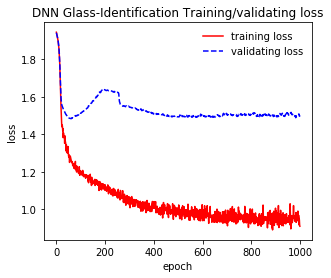

In [14]:
#----------------------------------------
# Summarize history for loss.

plt.ion()

plt.figure('DNN Glass-Identification loss', figsize = (4.8, 4.0))
plt.plot(history.history['loss'], "r-")
plt.plot(history.history['val_loss'], "b--")
plt.title('DNN Glass-Identification Training/validating loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validating loss'], loc = "best", frameon = False)
#plt.show()



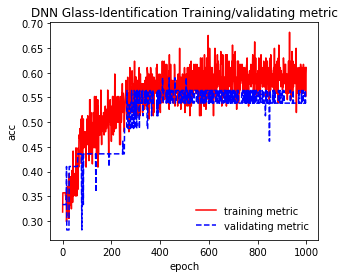

In [15]:
#----------------------------------------
# Summarize history for metric.

plt.figure('DNN Glass-Identification metric', figsize = (4.8, 4.0))
plt.plot(history.history['acc'], "r-")
plt.plot(history.history['val_acc'], "b--")
plt.title('DNN Glass-Identification Training/validating metric')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['training metric', 'validating metric'], loc = "best", frameon = False)
#plt.show()
